In [267]:
import numpy as np
import tensorflow as tf
import spacetrack.operators as op
from datetime import datetime,timedelta
import pandas as pd
from spacetrack import SpaceTrackClient
from io import StringIO  # Import StringIO
import time
import matplotlib.pyplot as plt
import tqdm

In [2]:
# Add the directory to sys.path
import sys
sys.path.append('.')

# Now you can import the module
from utils.tle_processing import *

# Examples of available satellites

In [3]:
LEO_names = [
    {'sat_name': 'International Space Station (ISS)', 'norad_id': 25544, 'sat_type': 'LEO'},
    {'sat_name': 'STARLINK-4714', 'norad_id': 44714, 'sat_type': 'LEO'},
    {'sat_name': 'STARLINK-44716', 'norad_id': 44716, 'sat_type': 'LEO'},
    {'sat_name': 'Hubble Space Telescope', 'norad_id': 20580, 'sat_type': 'LEO'},
    {'sat_name': 'Terra', 'norad_id': 25994, 'sat_type': 'LEO'},
    {'sat_name': 'Aqua', 'norad_id': 27424, 'sat_type': 'LEO'},
    {'sat_name': 'Sentinel-1A', 'norad_id': 39634, 'sat_type': 'LEO'},
    {'sat_name': 'ELSA-D', 'norad_id': 47944, 'sat_type': 'LEO'},
    {'sat_name': 'Tianzhou-9', 'norad_id': 64786, 'sat_type': 'LEO'},
    {'sat_name': 'GOSAT-2', 'norad_id': 43764, 'sat_type': 'LEO'}
]

MEO_names = [
    {'sat_name': 'GPS IIR-20 (M)', 'norad_id': 32360, 'sat_type': 'MEO'},
    {'sat_name': 'GLONASS-K 1', 'norad_id': 37372, 'sat_type': 'MEO'},
    {'sat_name': 'GALILEO-PFM (IOV-1)', 'norad_id': 37846, 'sat_type': 'MEO'},
    {'sat_name': 'BeiDou-3 G1', 'norad_id': 45543, 'sat_type': 'MEO'},
    {'sat_name': 'O3B FM1', 'norad_id': 39188, 'sat_type': 'MEO'},
    {'sat_name': 'O3B FM2', 'norad_id': 39190, 'sat_type': 'MEO'},
    {'sat_name': 'O3B FM3', 'norad_id': 40082, 'sat_type': 'MEO'},
    {'sat_name': 'O3B FM4', 'norad_id': 39189, 'sat_type': 'MEO'},
    {'sat_name': 'O3B FM5', 'norad_id': 39188, 'sat_type': 'MEO'},
    {'sat_name': 'QZSS-1 (Michibiki)', 'norad_id': 36878, 'sat_type': 'MEO'}
]

GEO_names = [
    {'sat_name': 'GOES 16', 'norad_id': 41866, 'sat_type': 'GEO'},
    {'sat_name': 'GOES 17', 'norad_id': 43234, 'sat_type': 'GEO'},
    {'sat_name': 'NSS-9', 'norad_id': 34195, 'sat_type': 'GEO'},
    {'sat_name': 'AMC-18', 'norad_id': 29699, 'sat_type': 'GEO'},
    {'sat_name': 'SKYNET 4B', 'norad_id': 19917, 'sat_type': 'GEO'},
    {'sat_name': 'ANIK A2', 'norad_id': 6437, 'sat_type': 'GEO'},
    {'sat_name': 'YAMAL 300K', 'norad_id': 38997, 'sat_type': 'GEO'},
    {'sat_name': 'GSAT-16', 'norad_id': 40356, 'sat_type': 'GEO'},
    {'sat_name': 'COMSATBw-1', 'norad_id': 36504, 'sat_type': 'GEO'},
    {'sat_name': 'GALILEO FOC-2', 'norad_id': 40129, 'sat_type': 'GEO'}
]

SSO_names = [
    {'sat_name': 'TerraSAR-X', 'norad_id': 31102, 'sat_type': 'SSO'},
    {'sat_name': 'GRACE-FO 1', 'norad_id': 43493, 'sat_type': 'SSO'},
    {'sat_name': 'Sentinel-2A', 'norad_id': 40697, 'sat_type': 'SSO'},
    {'sat_name': 'Sentinel-3A', 'norad_id': 41345, 'sat_type': 'SSO'},
    {'sat_name': 'Landsat 8', 'norad_id': 39084, 'sat_type': 'SSO'},
    {'sat_name': 'Landsat 9', 'norad_id': 49451, 'sat_type': 'SSO'},
    {'sat_name': 'MetOp-A', 'norad_id': 29499, 'sat_type': 'SSO'},
    {'sat_name': 'MetOp-B', 'norad_id': 38771, 'sat_type': 'SSO'},
    {'sat_name': 'Aalto-1', 'norad_id': 42775, 'sat_type': 'SSO'},
    {'sat_name': 'CALIPSO', 'norad_id': 29100, 'sat_type': 'SSO'}
]

In [294]:
out_df.to_csv('Dataset/satelite_names_102025.csv')

In [271]:
out_df.shape

(2439, 13)

In [295]:
out_df.shape

(54610, 14)

In [289]:
out_df

,Satellite Name,Epoch,First Derivative Mean Motion,Second Derivative Mean Motion,BSTAR Drag Term,Element Set Number,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Eccentricity,Argument of Perigee (degrees),Mean Anomaly (degrees),Mean Motion (revolutions per day),Revolution Number at Epoch,type
0,25544U 98067A,24001.01267188,0.000165,0.0,0.0,999,51.6422,68.6294,0.000335,343.4617,78.0593,15.499614,43247,LEO
1,25544U 98067A,23365.61481612,0.000161,0.0,0.0,999,51.6402,70.6020,0.000344,336.5999,23.4833,15.499470,43240,LEO
2,25544U 98067A,24001.19509446,0.000161,0.0,0.0,999,51.6400,67.7274,0.000347,339.1814,20.9033,15.499661,43250,LEO
3,25544U 98067A,24001.38851907,0.000159,0.0,0.0,999,51.6401,66.7692,0.000347,340.1680,19.9173,15.499721,43253,LEO
4,25544U 98067A,24001.60933343,0.000463,0.0,0.0,999,51.6411,65.6708,0.000356,343.1842,169.8453,15.499936,43256,LEO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,20580U 90037B,24364.55418090,0.000120,0.0,0.0,999,28.4682,112.1812,0.000253,34.7319,325.3440,15.220434,70678,LEO
859,20580U 90037B,24365.01316724,0.000127,0.0,0.0,999,28.4683,109.0859,0.000256,39.6785,320.3996,15.220562,70711,LEO
860,20580U 90037B,24365.60328680,0.000145,0.0,0.0,999,28.4686,105.1058,0.000261,45.3840,314.6966,15.220734,70694,LEO
861,20580U 90037B,24366.45567064,0.000130,0.0,0.0,999,28.4687,99.3568,0.000268,53.9068,306.1774,15.220954,70733,LEO


# Misc

In [66]:
# start_date = datetime(2024, 10, 30)
# end_date = datetime(2024, 10, 31)
start_date = datetime(2023, 1, 1)
end_date = datetime(2025, 1, 1)

start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')
drange = op.inclusive_range(start_date_str, end_date_str)

In [67]:
st = SpaceTrackClient('noppachanin.phys@gmail.com', 'MySpaceTrack1999')

# LEO

# MEO

#GEO

#SSO

#         limit=22,

# Format the dates as strings for the query
# CANX$ = 40055
# ISS (LEO) = 25544
# ABS-2 = 39508

try:
    tle_data = st.gp_history(
        norad_cat_id='39508',
        creation_date=drange,
        orderby="CREATION_DATE asc", 
        format='tle'
    )
    print(len(tle_data))
except Exception as e:
    print(f"An error occurred: {e}")

211540


In [254]:
# Use StringIO to treat the string as a file
tle_file = StringIO(tle_data)

# Read the lines from the string
lines = tle_file.readlines()
lines[:10]


['1 39508U 14006A   22365.81055375 -.00000078  00000-0  00000-0 0  9994\n',
 '2 39508   0.0215  25.8402 0003306 247.8346 193.2485  1.00271716 32622\n',
 '1 39508U 14006A   23001.24841045 -.00000077  00000-0  00000+0 0  9994\n',
 '2 39508   0.0221  28.0383 0003335 246.1065 350.8383  1.00271784 32650\n',
 '1 39508U 14006A   23001.52783458 -.00000077  00000-0  00000-0 0  9999\n',
 '2 39508   0.0224  29.6144 0003354 244.8477  91.3892  1.00271827 32625\n',
 '1 39508U 14006A   23001.88650796 -.00000076  00000-0  00000-0 0  9995\n',
 '2 39508   0.0228  30.5064 0003356 244.4137 220.4076  1.00271868 32637\n',
 '1 39508U 14006A   23002.46032561 -.00000075  00000-0  00000+0 0  9992\n',
 '2 39508   0.0235  33.7133 0003395 241.9099  66.8445  1.00271951 32678\n']

In [255]:
len(lines)

3022

In [69]:
def tle_to_dataframe(tle_data_string):
    """
    Parses a string containing TLE data into a Pandas DataFrame.

    Args:
        tle_data_string (str): A string containing TLE data in the standard two-line format.

    Returns:
        pandas.DataFrame: A DataFrame containing the parsed TLE data.  Returns an empty
                        DataFrame if the input string is empty or only contains headers.
    """
    # Ensure the input is a string
    if not isinstance(tle_data_string, str):
        raise TypeError("Input must be a string.")

    # Use StringIO to treat the string as a file
    tle_file = StringIO(tle_data_string)

    # Read the lines from the string
    lines = tle_file.readlines()

    if not lines:
        return pd.DataFrame()  # Return an empty DataFrame for empty input

    # Initialize lists to store the data
    data = []
    header_names = [
        "Satellite Name", "Epoch", 
        "First Derivative Mean Motion", "Second Derivative Mean Motion",
        "BSTAR Drag Term", "Element Set Number", "Inclination (degrees)",
        "Right Ascension of the Ascending Node (degrees)", "Eccentricity",
        "Argument of Perigee (degrees)", "Mean Anomaly (degrees)",
        "Mean Motion (revolutions per day)", "Revolution Number at Epoch"
    ]

    # Process TLE lines in pairs
    for i in range(0, len(lines) - 1, 2):
        try:
            line1 = lines[i].strip()
            line2 = lines[i + 1].strip()

            # Extract data from line 1
            satellite_name = line1[2:18].strip()
            epoch = line1[18:32].strip()
            first_derivative_mean_motion = float(line1[33:43].strip())

            # Handle potential errors in these fields
            second_derivative_mean_motion_str = line1[44:52].replace('-', '-0').strip()
            if second_derivative_mean_motion_str:
                try:
                    second_derivative_mean_motion = float(second_derivative_mean_motion_str)
                except ValueError:
                    second_derivative_mean_motion = 0.0
            else:
                second_derivative_mean_motion = 0.0

            bstar_drag_term_str = line1[53:61].replace('-', '-0').strip()
            if bstar_drag_term_str:
                try:
                    bstar_drag_term = float(bstar_drag_term_str)
                except ValueError:
                    bstar_drag_term = 0.0
            else:
                bstar_drag_term = 0.0
            element_set_number = int(line1[64:68].strip())

            # Extract data from line 2
            inclination = float(line2[8:16].strip())
            raan = float(line2[17:25].strip())
            eccentricity = float("0." + line2[26:33].strip())  # Add leading zero
            arg_of_perigee = float(line2[34:42].strip())
            mean_anomaly = float(line2[43:51].strip())
            mean_motion = float(line2[52:63].strip())
            revolution_number = int(line2[63:68].strip())

            # Append the data as a list
            data.append([
                satellite_name,  epoch,
                first_derivative_mean_motion, second_derivative_mean_motion,
                bstar_drag_term, element_set_number, inclination, raan, eccentricity,
                arg_of_perigee, mean_anomaly, mean_motion, revolution_number
            ])
        except (ValueError, IndexError) as e:
            print(f"Error parsing TLE lines {i+1}-{i+2}: {e}. Skipping these lines.")
            # Handle errors in parsing (e.g., malformed TLE data)
            continue

    # Create the Pandas DataFrame
    df = pd.DataFrame(data, columns=header_names)
    return df

df = tle_to_dataframe(tle_data)
# print(tle_data)
df.head()


,Satellite Name,Epoch,First Derivative Mean Motion,Second Derivative Mean Motion,BSTAR Drag Term,Element Set Number,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Eccentricity,Argument of Perigee (degrees),Mean Anomaly (degrees),Mean Motion (revolutions per day),Revolution Number at Epoch
0,39508U 14006A,22365.81055375,-7.800000e-07,0.0,0.0,999,0.0215,25.8402,0.000331,247.8346,193.2485,1.002717,3262
1,39508U 14006A,23001.24841045,-7.700000e-07,0.0,0.0,999,0.0221,28.0383,0.000333,246.1065,350.8383,1.002718,3265
2,39508U 14006A,23001.52783458,-7.700000e-07,0.0,0.0,999,0.0224,29.6144,0.000335,244.8477,91.3892,1.002718,3262
3,39508U 14006A,23001.88650796,-7.600000e-07,0.0,0.0,999,0.0228,30.5064,0.000336,244.4137,220.4076,1.002719,3263
4,39508U 14006A,23002.46032561,-7.500000e-07,0.0,0.0,999,0.0235,33.7133,0.000340,241.9099,66.8445,1.002720,3267


In [70]:
def tle_epoch_to_datetime(epoch: str) -> datetime:
    """
    Converts a TLE epoch string (YYDDD.fractionalday) to a datetime object.

    Args:
        epoch (str): The TLE epoch string in the format YYDDD.fractionalday.

    Returns:
        datetime: The corresponding datetime object.

    Raises:
        ValueError: If the epoch string is invalid or the year is invalid.
    """
    if not isinstance(epoch, str) or len(epoch) < 5:
        raise ValueError("Invalid TLE epoch format. Must be YYDDD.fractionalday.")

    year_str = epoch[:2]
    day_str = epoch[2:]

    try:
        year = int(year_str)
        day_of_year = float(day_str)
    except ValueError:
        raise ValueError("Invalid TLE epoch format.  Must be YYDDD.fractionalday.")

    if year < 0 or year > 99:
        raise ValueError("Invalid TLE year.  Must be 0-99.")

    # Determine the century
    century = 2000 if year < 57 else 1900  # Year 57 is the cutoff

    # Calculate the full year.
    full_year = century + year

    # Create a datetime object for the beginning of the year
    start_of_year = datetime(full_year, 1, 1)

    # Calculate the timedelta for the day of year (including fractional part)
    day_delta = timedelta(days=day_of_year - 1)  # Subtract 1 as the year starts on day 1

    # Add the timedelta to the start of the year
    # (year, month, day, hour=0, minute=0, second=0)
    return start_of_year + day_delta

In [71]:
tle_df = df.copy()
print(tle_df.shape)
tle_df.head()

(1511, 13)


,Satellite Name,Epoch,First Derivative Mean Motion,Second Derivative Mean Motion,BSTAR Drag Term,Element Set Number,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Eccentricity,Argument of Perigee (degrees),Mean Anomaly (degrees),Mean Motion (revolutions per day),Revolution Number at Epoch
0,39508U 14006A,22365.81055375,-7.800000e-07,0.0,0.0,999,0.0215,25.8402,0.000331,247.8346,193.2485,1.002717,3262
1,39508U 14006A,23001.24841045,-7.700000e-07,0.0,0.0,999,0.0221,28.0383,0.000333,246.1065,350.8383,1.002718,3265
2,39508U 14006A,23001.52783458,-7.700000e-07,0.0,0.0,999,0.0224,29.6144,0.000335,244.8477,91.3892,1.002718,3262
3,39508U 14006A,23001.88650796,-7.600000e-07,0.0,0.0,999,0.0228,30.5064,0.000336,244.4137,220.4076,1.002719,3263
4,39508U 14006A,23002.46032561,-7.500000e-07,0.0,0.0,999,0.0235,33.7133,0.000340,241.9099,66.8445,1.002720,3267


In [72]:
# Process time
tle_df['Epoch Date'] = tle_df['Epoch'].apply(lambda x : tle_epoch_to_datetime(x).date())
tle_df['Epoch Time'] = tle_df['Epoch'].apply(lambda x : tle_epoch_to_datetime(x).time())
tle_df['Epoch'] = tle_df['Epoch'].apply(lambda x : tle_epoch_to_datetime(x))
tle_df.sort_values(by='Epoch', ascending=True, inplace=True)
tle_df.set_index('Epoch', inplace=True)

tle_df


,Satellite Name,First Derivative Mean Motion,Second Derivative Mean Motion,BSTAR Drag Term,Element Set Number,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Eccentricity,Argument of Perigee (degrees),Mean Anomaly (degrees),Mean Motion (revolutions per day),Revolution Number at Epoch,Epoch Date,Epoch Time
Epoch,,,,,,,,,,,,,,
2022-12-31 19:27:11.844000,39508U 14006A,-7.800000e-07,0.0,0.0,999,0.0215,25.8402,0.000331,247.8346,193.2485,1.002717,3262,2022-12-31,19:27:11.844000
2023-01-01 05:57:42.662880,39508U 14006A,-7.700000e-07,0.0,0.0,999,0.0221,28.0383,0.000333,246.1065,350.8383,1.002718,3265,2023-01-01,05:57:42.662880
2023-01-01 12:40:04.907712,39508U 14006A,-7.700000e-07,0.0,0.0,999,0.0224,29.6144,0.000335,244.8477,91.3892,1.002718,3262,2023-01-01,12:40:04.907712
2023-01-01 21:16:34.287744,39508U 14006A,-7.600000e-07,0.0,0.0,999,0.0228,30.5064,0.000336,244.4137,220.4076,1.002719,3263,2023-01-01,21:16:34.287744
2023-01-02 11:02:52.132704,39508U 14006A,-7.500000e-07,0.0,0.0,999,0.0235,33.7133,0.000340,241.9099,66.8445,1.002720,3267,2023-01-02,11:02:52.132704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-29 21:52:42.711744,39508U 14006A,-6.000000e-07,0.0,0.0,999,0.0183,23.6706,0.000328,244.5367,233.7478,1.002717,3992,2024-12-29,21:52:42.711744
2024-12-30 14:04:12.533952,39508U 14006A,-6.200000e-07,0.0,0.0,999,0.0175,30.0560,0.000327,238.8069,116.6312,1.002716,3992,2024-12-30,14:04:12.533952
2024-12-30 21:40:36.189696,39508U 14006A,-6.300000e-07,0.0,0.0,999,0.0174,33.7200,0.000328,235.3832,230.8019,1.002716,3993,2024-12-30,21:40:36.189696


In [73]:

resample_tle_df = tle_df[['First Derivative Mean Motion',
       'Second Derivative Mean Motion', 'BSTAR Drag Term',
        'Inclination (degrees)',
       'Right Ascension of the Ascending Node (degrees)', 'Eccentricity',
       'Argument of Perigee (degrees)', 'Mean Anomaly (degrees)',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch']].resample('D').mean()
resample_tle_df.head()

,First Derivative Mean Motion,Second Derivative Mean Motion,BSTAR Drag Term,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Eccentricity,Argument of Perigee (degrees),Mean Anomaly (degrees),Mean Motion (revolutions per day),Revolution Number at Epoch
Epoch,,,,,,,,,,
2022-12-31,-7.800000e-07,0.0,0.0,0.021500,25.840200,0.000331,247.834600,193.248500,1.002717,3262.000000
2023-01-01,-7.666667e-07,0.0,0.0,0.022433,29.386367,0.000335,245.122633,220.878367,1.002718,3263.333333
2023-01-02,-7.500000e-07,0.0,0.0,0.023933,33.910100,0.000340,241.873133,118.468700,1.002720,3264.666667
2023-01-03,-7.400000e-07,0.0,0.0,0.025600,37.403400,0.000343,239.556800,93.892800,1.002721,3268.000000
2023-01-04,-7.400000e-07,0.0,0.0,0.026800,41.001500,0.000344,237.046200,43.519500,1.002722,3265.000000


In [296]:
df.describe()

,First Derivative Mean Motion,Second Derivative Mean Motion,BSTAR Drag Term,Element Set Number,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Eccentricity,Argument of Perigee (degrees),Mean Anomaly (degrees),Mean Motion (revolutions per day),Revolution Number at Epoch
count,1.511000e+03,1511.0,1511.0,1511.0,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000
mean,-8.257313e-07,0.0,0.0,999.0,0.034132,164.571475,0.000336,178.459247,160.193034,1.002716,3622.845136
std,1.071521e-07,0.0,0.0,0.0,0.018447,111.306309,0.000038,105.679475,77.335324,0.000010,215.056869
min,-1.040000e-06,0.0,0.0,999.0,0.000800,0.825600,0.000237,0.010300,12.621700,1.002479,3262.000000
25%,-9.100000e-07,0.0,0.0,999.0,0.017200,78.463900,0.000308,90.766550,91.352800,1.002712,3420.500000
50%,-8.300000e-07,0.0,0.0,999.0,0.032200,96.567900,0.000341,175.595700,172.543100,1.002717,3619.000000
75%,-7.500000e-07,0.0,0.0,999.0,0.049700,286.442900,0.000365,273.054000,216.150200,1.002721,3808.500000
max,-5.300000e-07,0.0,0.0,999.0,0.073300,359.861900,0.000416,359.773400,353.297800,1.002767,3998.000000


In [301]:
df.describe().to_csv('Plots_and_table/description.csv', index=True) 

In [297]:
df.columns

Index(['Satellite Name', 'Epoch', 'First Derivative Mean Motion',
       'Second Derivative Mean Motion', 'BSTAR Drag Term',
       'Element Set Number', 'Inclination (degrees)',
       'Right Ascension of the Ascending Node (degrees)', 'Eccentricity',
       'Argument of Perigee (degrees)', 'Mean Anomaly (degrees)',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch'],
      dtype='object')

# EDA

In [76]:
tle_df.columns

Index(['Satellite Name', 'First Derivative Mean Motion',
       'Second Derivative Mean Motion', 'BSTAR Drag Term',
       'Element Set Number', 'Inclination (degrees)',
       'Right Ascension of the Ascending Node (degrees)', 'Eccentricity',
       'Argument of Perigee (degrees)', 'Mean Anomaly (degrees)',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch',
       'Epoch Date', 'Epoch Time'],
      dtype='object')

## Find non-stationary features

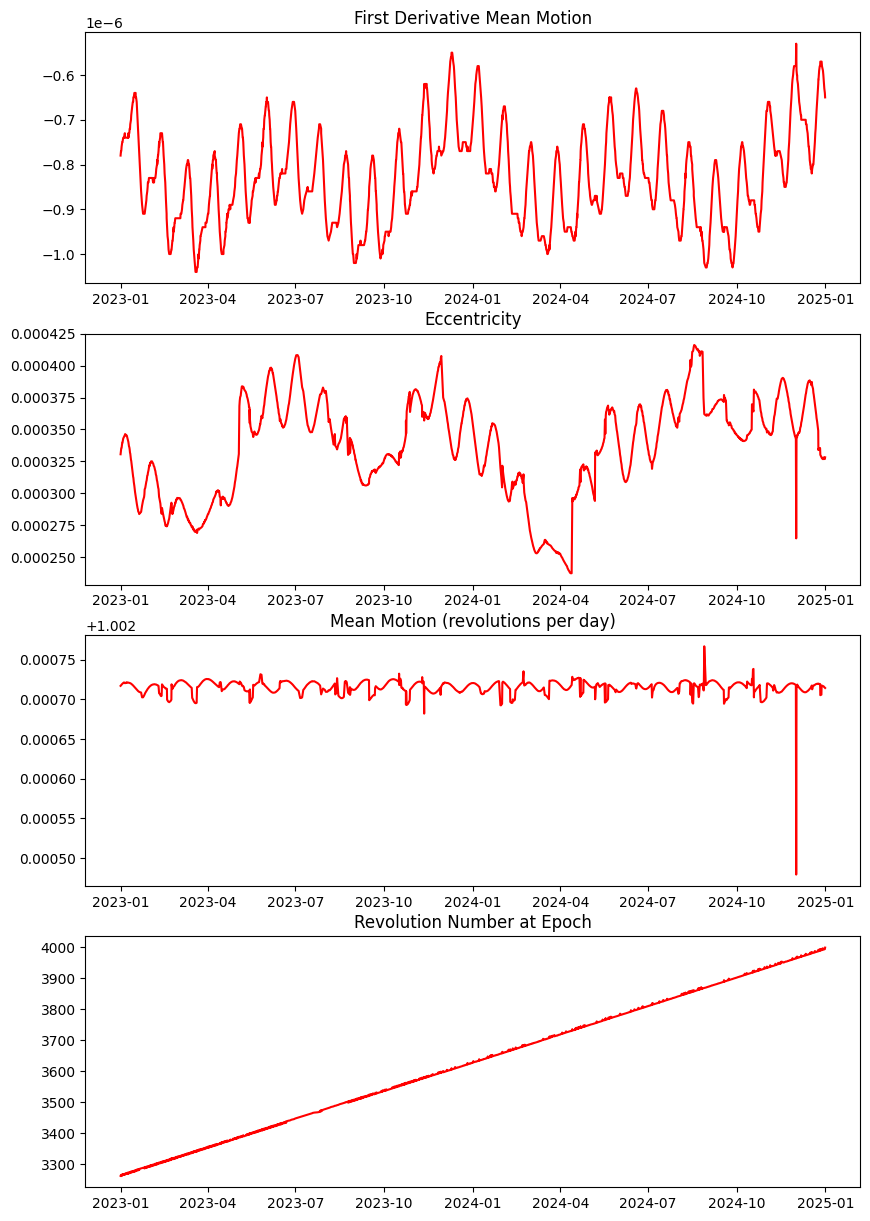

In [321]:
fig, ax = plt.subplots(4,1, figsize=(10,15))
# plt.suptitle('Positional elements')
ax[0].plot(tle_df['First Derivative Mean Motion'],'r')
ax[0].set_title('First Derivative Mean Motion')
ax[1].plot(tle_df['Eccentricity'],'r')
ax[1].set_title('Eccentricity')

# ax[0,2].plot(tle_df['Eccentricity'],'r')


ax[2].plot(tle_df['Mean Motion (revolutions per day)'],'r')
ax[2].set_title('Mean Motion (revolutions per day)')

ax[3].plot(tle_df['Revolution Number at Epoch'],'r')
ax[3].set_title('Revolution Number at Epoch')

# ax[1,2].plot(tle_df['Revolution Number at Epoch'],'r')

plt.savefig('Experiment/Plots/non_positional_features.pdf', dpi=300, bbox_inches='tight')
plt.show()

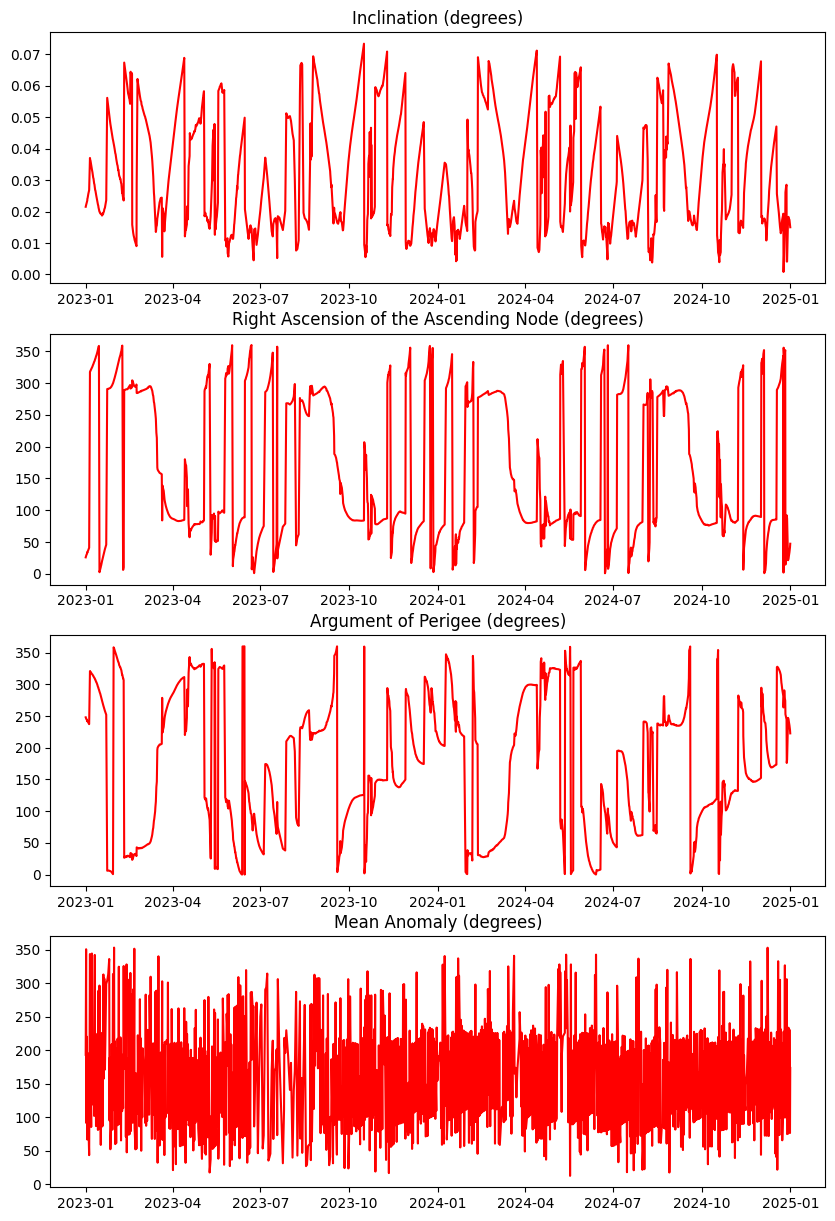

In [322]:
fig, ax = plt.subplots(4,1, figsize=(10,15))
# plt.suptitle('Positional elements')
ax[0].plot(tle_df['Inclination (degrees)'],'r')
ax[0].set_title('Inclination (degrees)')
ax[1].plot(tle_df['Right Ascension of the Ascending Node (degrees)'],'r')
ax[1].set_title('Right Ascension of the Ascending Node (degrees)')

# ax[0,2].plot(tle_df['Eccentricity'],'r')


ax[2].plot(tle_df['Argument of Perigee (degrees)'],'r')
ax[2].set_title('Argument of Perigee (degrees)')

ax[3].plot(tle_df['Mean Anomaly (degrees)'],'r')
ax[3].set_title('Mean Anomaly (degrees)')

# ax[1,2].plot(tle_df['Revolution Number at Epoch'],'r')

plt.savefig('Experiment/Plots/positional_features.pdf', dpi=300, bbox_inches='tight')
plt.show()

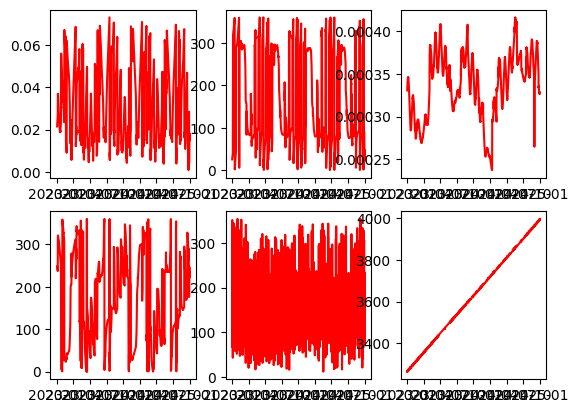

In [300]:
fig, ax = plt.subplots(2,3)
ax[0,0].plot(tle_df['Inclination (degrees)'],'r')
ax[0,1].plot(tle_df['Right Ascension of the Ascending Node (degrees)'],'r')
ax[0,2].plot(tle_df['Eccentricity'],'r')


ax[1,0].plot(tle_df['Argument of Perigee (degrees)'],'r')
ax[1,1].plot(tle_df['Mean Anomaly (degrees)'],'r')
ax[1,2].plot(tle_df['Revolution Number at Epoch'],'r')
plt.show()

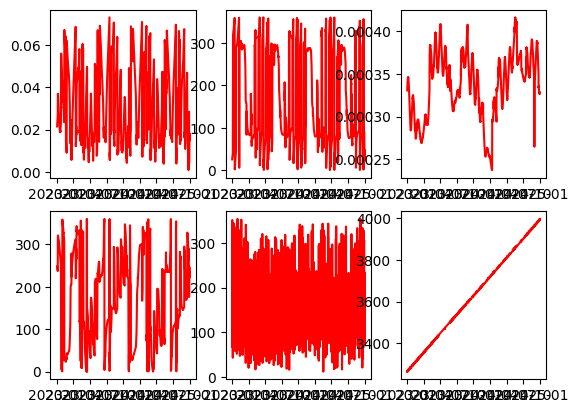

In [78]:
fig, ax = plt.subplots(2,3)
ax[0,0].plot(tle_df['Inclination (degrees)'],'r')
ax[0,1].plot(tle_df['Right Ascension of the Ascending Node (degrees)'],'r')
ax[0,2].plot(tle_df['Eccentricity'],'r')


ax[1,0].plot(tle_df['Argument of Perigee (degrees)'],'r')
ax[1,1].plot(tle_df['Mean Anomaly (degrees)'],'r')
ax[1,2].plot(tle_df['Revolution Number at Epoch'],'r')
plt.show()

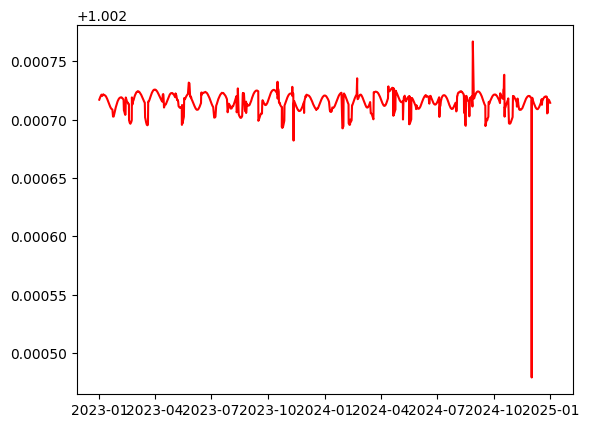

In [79]:
plt.plot(tle_df['Mean Motion (revolutions per day)'],'r')

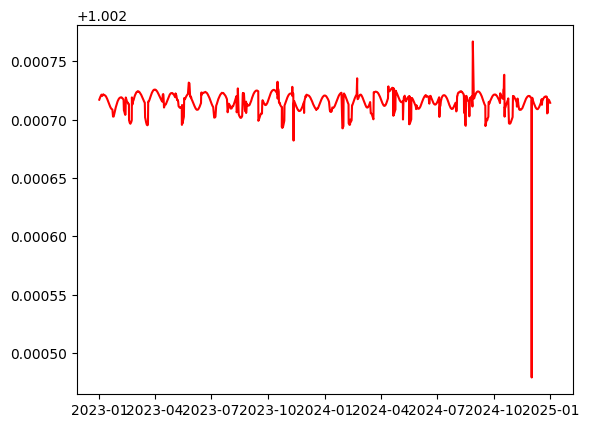

In [80]:
plt.plot(tle_df['Mean Motion (revolutions per day)'],'r')

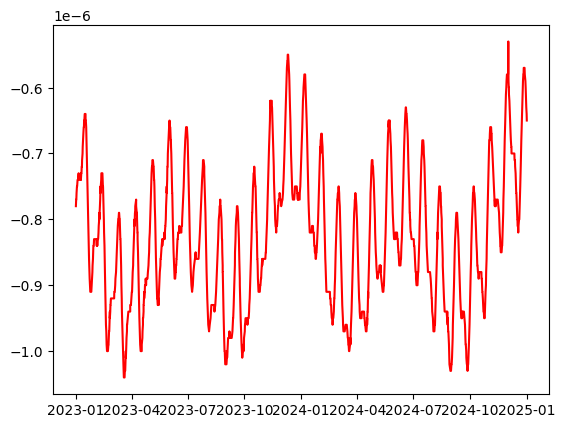

In [81]:
plt.plot(tle_df['First Derivative Mean Motion'],'r')

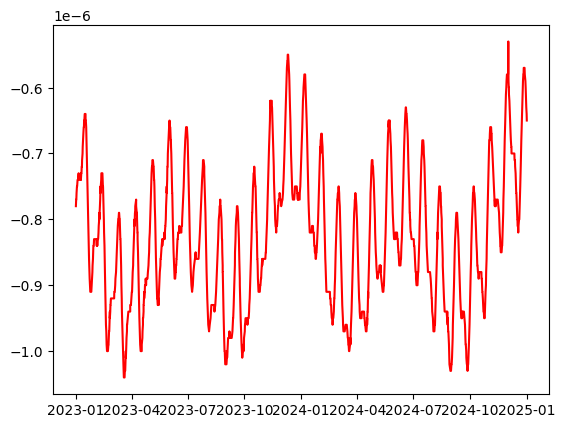

In [82]:
plt.plot(tle_df['First Derivative Mean Motion'],'r')

In [83]:
tle_df.columns

Index(['Satellite Name', 'First Derivative Mean Motion',
       'Second Derivative Mean Motion', 'BSTAR Drag Term',
       'Element Set Number', 'Inclination (degrees)',
       'Right Ascension of the Ascending Node (degrees)', 'Eccentricity',
       'Argument of Perigee (degrees)', 'Mean Anomaly (degrees)',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch',
       'Epoch Date', 'Epoch Time'],
      dtype='object')

In [84]:
 tle_df.drop(['Second Derivative Mean Motion', 'BSTAR Drag Term','Element Set Number','Epoch Date', 'Epoch Time', ],axis=1)

,Satellite Name,First Derivative Mean Motion,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Eccentricity,Argument of Perigee (degrees),Mean Anomaly (degrees),Mean Motion (revolutions per day),Revolution Number at Epoch
Epoch,,,,,,,,,
2022-12-31 19:27:11.844000,39508U 14006A,-7.800000e-07,0.0215,25.8402,0.000331,247.8346,193.2485,1.002717,3262
2023-01-01 05:57:42.662880,39508U 14006A,-7.700000e-07,0.0221,28.0383,0.000333,246.1065,350.8383,1.002718,3265
2023-01-01 12:40:04.907712,39508U 14006A,-7.700000e-07,0.0224,29.6144,0.000335,244.8477,91.3892,1.002718,3262
2023-01-01 21:16:34.287744,39508U 14006A,-7.600000e-07,0.0228,30.5064,0.000336,244.4137,220.4076,1.002719,3263
2023-01-02 11:02:52.132704,39508U 14006A,-7.500000e-07,0.0235,33.7133,0.000340,241.9099,66.8445,1.002720,3267
...,...,...,...,...,...,...,...,...,...
2024-12-29 21:52:42.711744,39508U 14006A,-6.000000e-07,0.0183,23.6706,0.000328,244.5367,233.7478,1.002717,3992
2024-12-30 14:04:12.533952,39508U 14006A,-6.200000e-07,0.0175,30.0560,0.000327,238.8069,116.6312,1.002716,3992
2024-12-30 21:40:36.189696,39508U 14006A,-6.300000e-07,0.0174,33.7200,0.000328,235.3832,230.8019,1.002716,3993


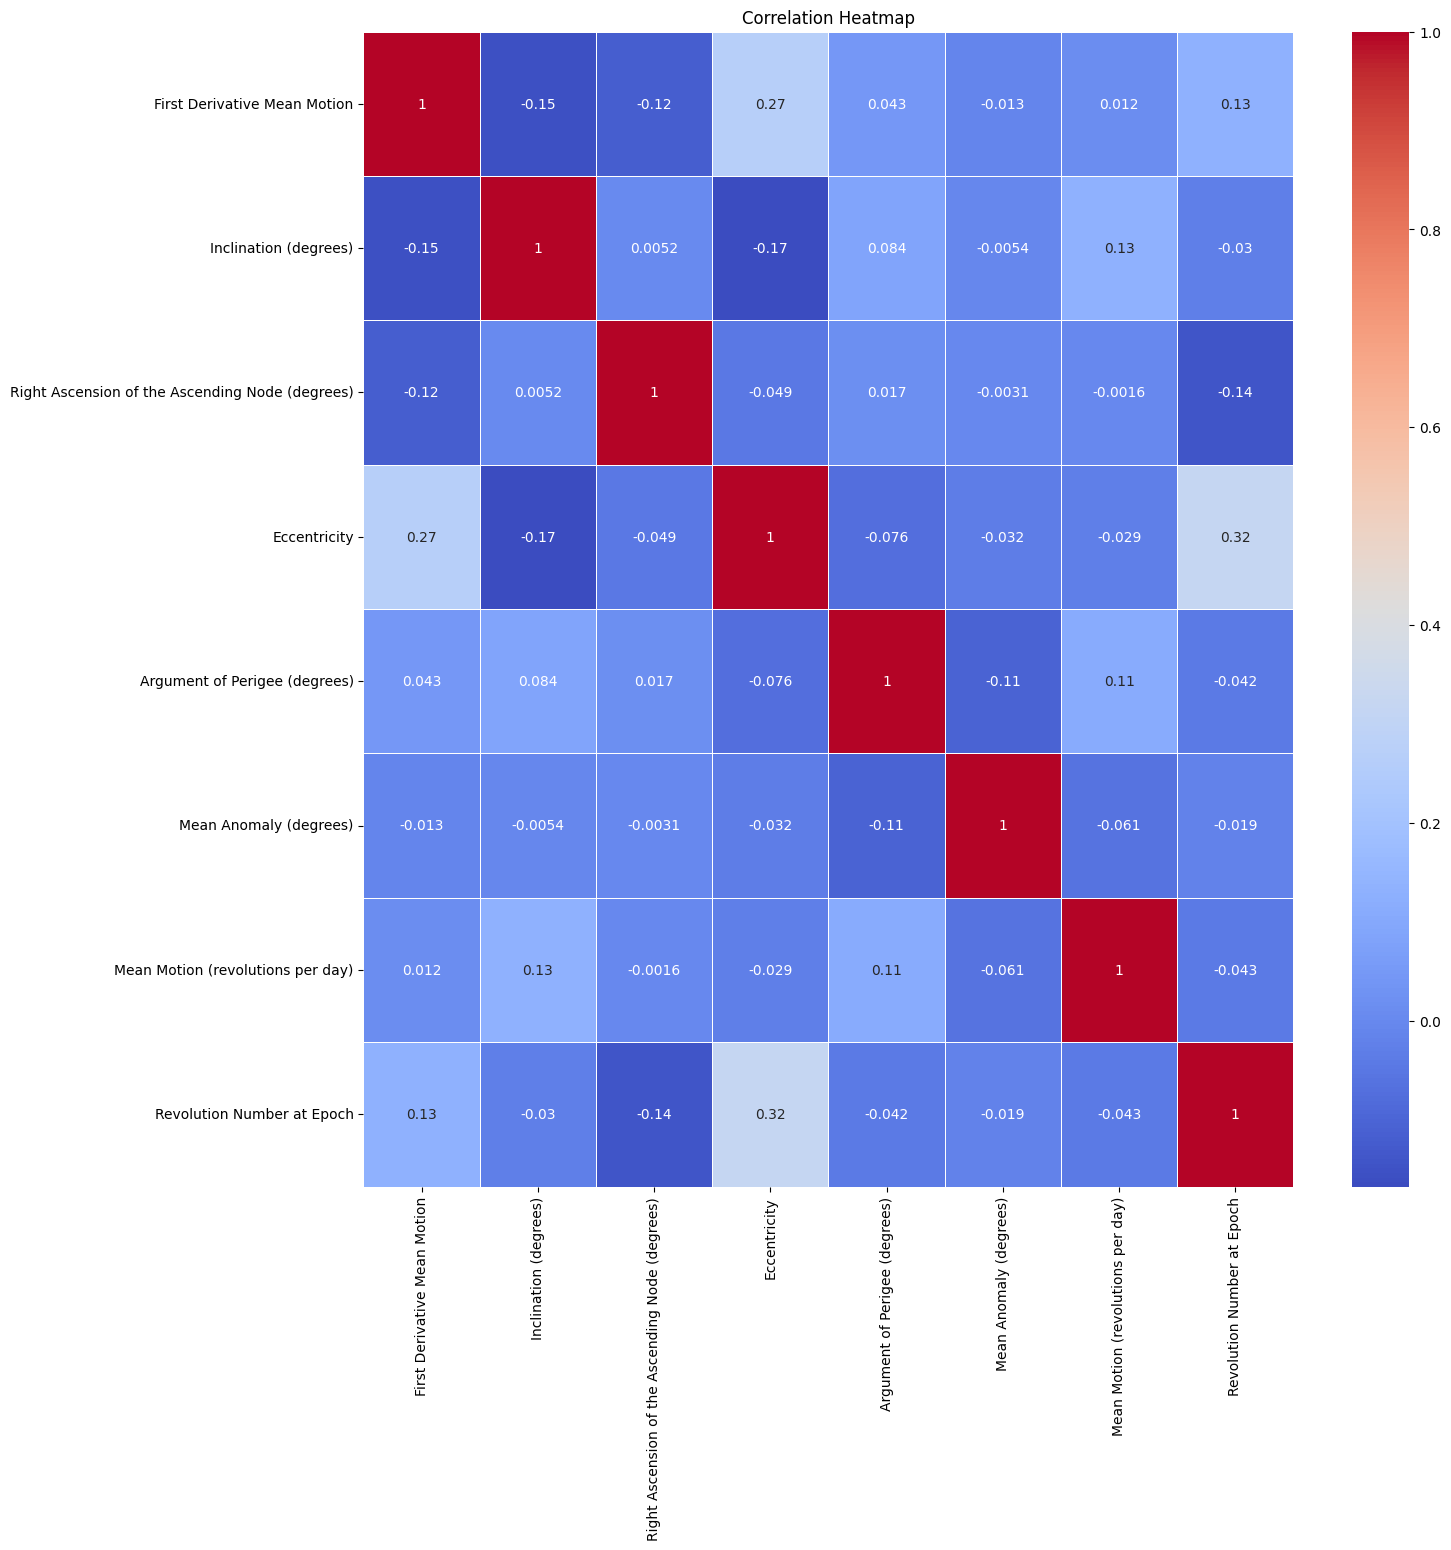

In [317]:
import seaborn as sns
# corr_df = tle_df.drop(['Satellite Name','Second Derivative Mean Motion', 'BSTAR Drag Term','Element Set Number','Epoch Date', 'Epoch Time', ],axis=1).corr()
# corr_df = tle_df

corr_df = resample_tle_df.drop(['Second Derivative Mean Motion', 'BSTAR Drag Term'],axis=1).corr()
# Create the heatmap
plt.figure(figsize=(15, 15))
# sns.heatmap(diff_radec_corr, annot=True, cmap='coolwarm', linewidths=.5)
sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=.5)
# corr_df = diff_radec_df.drop(['Satellite Name','Second Derivative Mean Motion', 'BSTAR Drag Term','Element Set Number','Epoch Date', 'Epoch Time', 'Diff Epoch Time',

plt.title('Correlation Heatmap')

plt.savefig('Experiment/Plots/correlations.pdf', dpi=300)

plt.show()

In [87]:
resample_tle_df.columns


Index(['First Derivative Mean Motion', 'Second Derivative Mean Motion',
       'BSTAR Drag Term', 'Inclination (degrees)',
       'Right Ascension of the Ascending Node (degrees)', 'Eccentricity',
       'Argument of Perigee (degrees)', 'Mean Anomaly (degrees)',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch'],
      dtype='object')

In [88]:
print('Dynamic features', """
['First Derivative Mean Motion',
'Mean Motion (revolutions per day)', 
'Revolution Number at Epoch'] """)

Dynamic features 
['First Derivative Mean Motion',
'Mean Motion (revolutions per day)', 
'Revolution Number at Epoch'] 


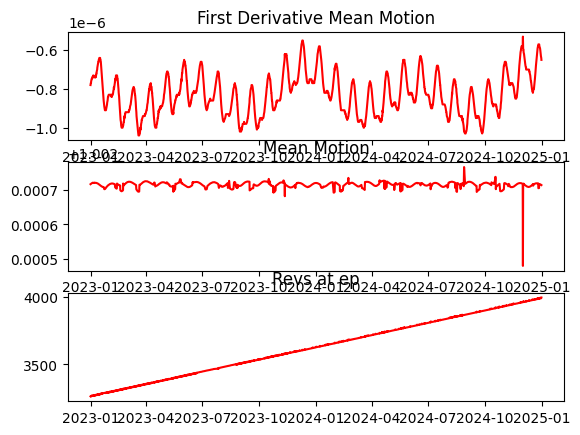

In [89]:
fig, ax = plt.subplots(3)

ax[0].set_title('First Derivative Mean Motion')
ax[0].plot(tle_df['First Derivative Mean Motion'],'r')

ax[1].set_title('Mean Motion')
ax[1].plot(tle_df['Mean Motion (revolutions per day)'],'r')



ax[2].set_title('Revs at ep')
ax[2].plot(tle_df['Revolution Number at Epoch'],'r')



plt.show()

# Multivariate Models
ref [Medium](https://medium.com/@786sksujanislam786/multivariate-time-series-forecasting-using-lstm-4f8a9d32a509)

ref [Multi-Step, Multi-Input, and Multi-Output](https://www.kaggle.com/code/nicapotato/keras-timeseries-multi-step-multi-output#Multi-Step,-Multi-Input,-and-Multi-Output)

ref [StackOverflow](https://stackoverflow.com/questions/72822576/how-to-reshape-multivariate-time-series-data-for-convlstm2d-model)

## TLE Prediction using single step LSTM
one model for one satellite

# Challenges
1. Non-Stationarity:

What it is:
A time series is non-stationary if its statistical properties (like mean and variance) change over time. 
How it looks in a time series plot:
A non-stationary series might show a trend (increasing or decreasing values over time) or seasonality (patterns that repeat over fixed intervals). 

How to identify it:
ACF Plot: A non-stationary series will have an ACF plot that decays slowly, meaning that past values have a long-lasting influence on future values. 
Differencing: Taking the difference between consecutive data points can make a non-stationary series stationary. If differencing removes the trend, it suggests non-stationarity. 
Dickey-Fuller Test: This statistical test explicitly tests for stationarity by checking for the presence of a unit root (a key indicator of non-stationarity). 

How to handle it:
Differencing: As mentioned, differencing can make the series stationary, allowing you to apply standard time series models. 
Other transformations: Techniques like taking the logarithm or other transformations can also help stabilize the variance. 

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,ConvLSTM2D
from sklearn.preprocessing import MinMaxScaler

In [91]:
resample_tle_df.shape[0]

732

In [92]:
learning_len = int(0.8* resample_tle_df.shape[0])
print(learning_len)


585


In [93]:
features = ['First Derivative Mean Motion','Inclination (degrees)',
         'Eccentricity',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch']
len(features)

5

In [94]:
# For learning 
learning_data =  resample_tle_df.iloc[:learning_len,:][features]
# For forecasting 
forecasting_data =  resample_tle_df.iloc[learning_len:,:][features]
learning_data.shape, forecasting_data.shape

((585, 5), (147, 5))

In [95]:
learning_data.columns

Index(['First Derivative Mean Motion', 'Inclination (degrees)', 'Eccentricity',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch'],
      dtype='object')

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from astropy.time import Time
import matplotlib.pyplot as plt# Process data

In [96]:
# import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from astropy.time import Time
import matplotlib.pyplot as plt

In [97]:
resample_tle_df.head()

,First Derivative Mean Motion,Second Derivative Mean Motion,BSTAR Drag Term,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Eccentricity,Argument of Perigee (degrees),Mean Anomaly (degrees),Mean Motion (revolutions per day),Revolution Number at Epoch
Epoch,,,,,,,,,,
2022-12-31,-7.800000e-07,0.0,0.0,0.021500,25.840200,0.000331,247.834600,193.248500,1.002717,3262.000000
2023-01-01,-7.666667e-07,0.0,0.0,0.022433,29.386367,0.000335,245.122633,220.878367,1.002718,3263.333333
2023-01-02,-7.500000e-07,0.0,0.0,0.023933,33.910100,0.000340,241.873133,118.468700,1.002720,3264.666667
2023-01-03,-7.400000e-07,0.0,0.0,0.025600,37.403400,0.000343,239.556800,93.892800,1.002721,3268.000000
2023-01-04,-7.400000e-07,0.0,0.0,0.026800,41.001500,0.000344,237.046200,43.519500,1.002722,3265.000000


In [98]:
learning_data.columns

Index(['First Derivative Mean Motion', 'Inclination (degrees)', 'Eccentricity',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch'],
      dtype='object')

In [99]:
TLE_df_time_series = learning_data.copy()

In [100]:
TLE_df_time_series.describe()

,First Derivative Mean Motion,Inclination (degrees),Eccentricity,Mean Motion (revolutions per day),Revolution Number at Epoch
count,5.670000e+02,567.000000,567.000000,567.000000,567.000000
mean,-8.306696e-07,0.033658,0.000328,1.002716,3555.695914
std,1.013790e-07,0.017792,0.000038,0.000007,169.810568
min,-1.040000e-06,0.005900,0.000237,1.002693,3262.000000
25%,-9.100000e-07,0.017600,0.000300,1.002712,3405.250000
50%,-8.300000e-07,0.031567,0.000330,1.002717,3560.000000
75%,-7.625000e-07,0.048800,0.000359,1.002721,3701.000000
max,-5.500000e-07,0.071600,0.000408,1.002731,3847.666667


In [101]:
stat_df = TLE_df_time_series.describe()
stat_df

,First Derivative Mean Motion,Inclination (degrees),Eccentricity,Mean Motion (revolutions per day),Revolution Number at Epoch
count,5.670000e+02,567.000000,567.000000,567.000000,567.000000
mean,-8.306696e-07,0.033658,0.000328,1.002716,3555.695914
std,1.013790e-07,0.017792,0.000038,0.000007,169.810568
min,-1.040000e-06,0.005900,0.000237,1.002693,3262.000000
25%,-9.100000e-07,0.017600,0.000300,1.002712,3405.250000
50%,-8.300000e-07,0.031567,0.000330,1.002717,3560.000000
75%,-7.625000e-07,0.048800,0.000359,1.002721,3701.000000
max,-5.500000e-07,0.071600,0.000408,1.002731,3847.666667


In [102]:
print("percentage of std values wrt to mean values")
stat_df.iloc[2,:] * 100 / stat_df.iloc[1,:]

percentage of std values wrt to mean values


First Derivative Mean Motion        -12.204497
Inclination (degrees)                52.859884
Eccentricity                         11.577203
Mean Motion (revolutions per day)     0.000684
Revolution Number at Epoch            4.775734
dtype: float64

In [103]:
TLE_df_time_series.index#.astype(float)

DatetimeIndex(['2022-12-31', '2023-01-01', '2023-01-02', '2023-01-03',
               '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07',
               '2023-01-08', '2023-01-09',
               ...
               '2024-07-28', '2024-07-29', '2024-07-30', '2024-07-31',
               '2024-08-01', '2024-08-02', '2024-08-03', '2024-08-04',
               '2024-08-05', '2024-08-06'],
              dtype='datetime64[ns]', name='Epoch', length=585, freq='D')

# Linear Regression

In [116]:
learning_data.dropna(inplace=True)

In [118]:
learning_data.columns

Index(['First Derivative Mean Motion', 'Inclination (degrees)', 'Eccentricity',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch'],
      dtype='object')

In [119]:
learning_data[100:]

,First Derivative Mean Motion,Inclination (degrees),Eccentricity,Mean Motion (revolutions per day),Revolution Number at Epoch
Epoch,,,,,
2023-04-11,-8.600000e-07,0.06575,0.000302,1.002717,3362.500000
2023-04-12,-9.000000e-07,0.06760,0.000301,1.002716,3364.000000
2023-04-13,-9.350000e-07,0.04045,0.000300,1.002718,3366.000000
2023-04-14,-9.750000e-07,0.01420,0.000294,1.002722,3367.000000
2023-04-15,-9.975000e-07,0.01700,0.000296,1.002713,3368.250000
...,...,...,...,...,...
2024-08-02,-9.700000e-07,0.04650,0.000359,1.002715,3842.000000
2024-08-03,-9.700000e-07,0.04725,0.000363,1.002721,3843.000000
2024-08-04,-9.600000e-07,0.04720,0.000365,1.002723,3846.500000


In [120]:
X = learning_data[['First Derivative Mean Motion', 'Inclination (degrees)', 'Eccentricity',
       'Mean Motion (revolutions per day)']].values
y = learning_data.iloc[:, -1].values

X.shape, y.shape


((567, 4), (567,))

In [121]:
X_train = X[:400,:4]
y_train = y[:400]

X_test = X[400:,:4]
y_test = y[400:]

In [122]:
X_train

array([[-7.80000000e-07,  2.15000000e-02,  3.30600000e-04,
         1.00271716e+00],
       [-7.66666667e-07,  2.24333333e-02,  3.34833333e-04,
         1.00271826e+00],
       [-7.50000000e-07,  2.39333333e-02,  3.39633333e-04,
         1.00271966e+00],
       ...,
       [-9.10000000e-07,  5.83000000e-02,  3.10400000e-04,
         1.00271336e+00],
       [-9.15000000e-07,  5.72500000e-02,  3.13250000e-04,
         1.00271494e+00],
       [-9.25000000e-07,  5.65000000e-02,  3.15350000e-04,
         1.00271654e+00]])

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [ 1.46033883e+08 -2.20721333e+01  1.13909407e+06 -1.85616793e+06]
Intercept: 1864419.0888631663


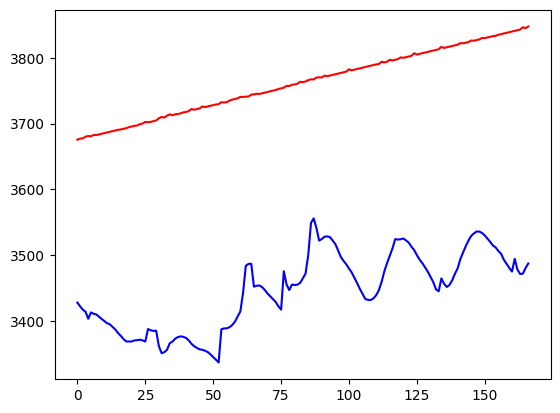

In [126]:
plt.plot(y_pred, 'b-')
plt.plot(y_test, 'r-')
plt.show()

In [128]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 316.42196605224797
MSE: 101505.82760823693
RMSE: 101505.82760823693


In [129]:
# from sklearn.ensemble import RandomForestRegressor

# MLP

In [130]:
learning_data.shape

(567, 5)

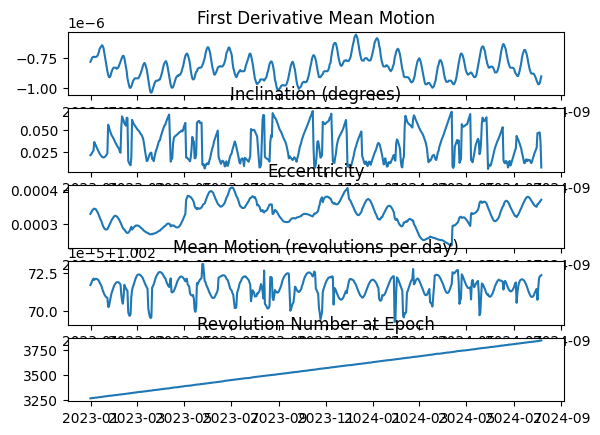

In [134]:
fig, ax= plt.subplots(5)
for i, col in enumerate(learning_data.columns):
    
    ax[i].plot(learning_data[col])
    ax[i].set_title(col)
    
plt.show()

In [136]:
X_train.shape

(452, 5)

In [187]:

time_series_data = learning_data.copy()

# Create lagged featu/res
X = time_series_data.iloc[:, :-1].to_numpy()
y = time_series_data.iloc[::, -1].to_numpy()


X.shape, y.shape

((567, 4), (567,))

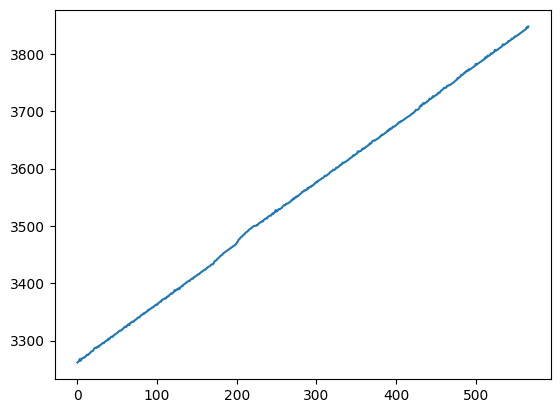

In [195]:
plt.plot(y)

In [184]:
learning_data.columns

Index(['First Derivative Mean Motion', 'Inclination (degrees)', 'Eccentricity',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch'],
      dtype='object')

In [196]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# X, y = make_regression(n_samples=200, n_features=20, random_state=1)
X_train = X[:400]
X_test = X[400:]

y_train = y[:400]
y_test = y[400:]
regr = MLPRegressor(random_state=1, max_iter=5000, tol=0.1)
regr.fit(X_train, y_train)


MLPRegressor(max_iter=5000, random_state=1, tol=0.1)

In [197]:
regr.predict(X_test[:2])


array([3504.41433385, 3502.69020617])

In [198]:
y_test[:2]

array([3675.5, 3677. ])

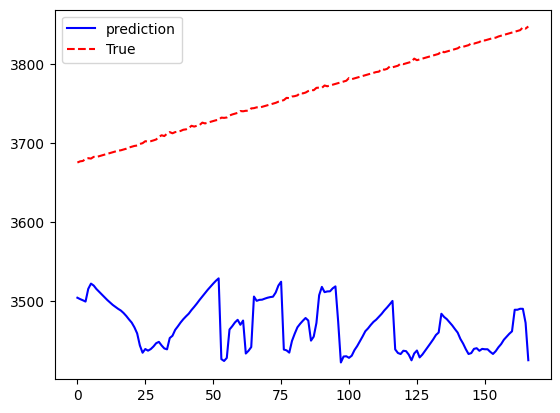

In [201]:
pred_result = regr.predict(X_test)
plt.plot(pred_result, 'b-',label='prediction')
plt.plot(y_test, 'r--', label='True')


plt.legend()
plt.show()

In [192]:
regr.score(X_test, y_test)

-0.028007218641798337

# Linear Regression of difference

In [202]:
learning_data.columns

Index(['First Derivative Mean Motion', 'Inclination (degrees)', 'Eccentricity',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch'],
      dtype='object')

In [ ]:
time_series_data = learning_data.copy()


In [209]:
time_series_data['diff_RevsAtEp'] = time_series_data['Revolution Number at Epoch'].diff()
time_series_data.dropna(inplace=True)

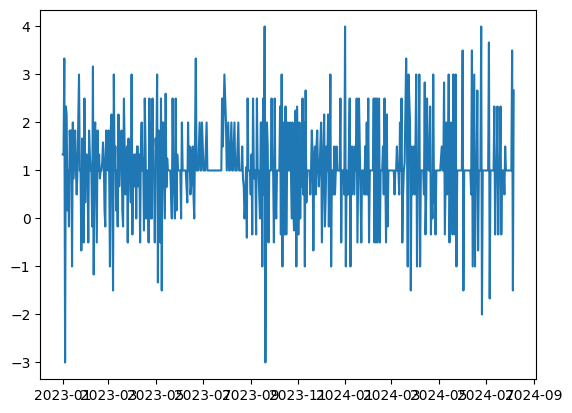

In [212]:
plt.plot(time_series_data['diff_RevsAtEp'])

In [210]:
time_series_data

,First Derivative Mean Motion,Inclination (degrees),Eccentricity,Mean Motion (revolutions per day),Revolution Number at Epoch,diff_RevsAtEp
Epoch,,,,,,
2023-01-01,-7.666667e-07,0.022433,0.000335,1.002718,3263.333333,1.333333
2023-01-02,-7.500000e-07,0.023933,0.000340,1.002720,3264.666667,1.333333
2023-01-03,-7.400000e-07,0.025600,0.000343,1.002721,3268.000000,3.333333
2023-01-04,-7.400000e-07,0.026800,0.000344,1.002722,3265.000000,-3.000000
2023-01-05,-7.366667e-07,0.036500,0.000346,1.002721,3267.333333,2.333333
...,...,...,...,...,...,...
2024-08-02,-9.700000e-07,0.046500,0.000359,1.002715,3842.000000,1.000000
2024-08-03,-9.700000e-07,0.047250,0.000363,1.002721,3843.000000,1.000000
2024-08-04,-9.600000e-07,0.047200,0.000365,1.002723,3846.500000,3.500000


In [211]:
time_series_data.corr()

,First Derivative Mean Motion,Inclination (degrees),Eccentricity,Mean Motion (revolutions per day),Revolution Number at Epoch,diff_RevsAtEp
First Derivative Mean Motion,1.000000,-0.180207,0.385174,0.117174,0.084490,-0.019430
Inclination (degrees),-0.180207,1.000000,-0.230304,0.126234,-0.063781,-0.023599
Eccentricity,0.385174,-0.230304,1.000000,-0.058506,0.083319,0.011588
Mean Motion (revolutions per day),0.117174,0.126234,-0.058506,1.000000,-0.017820,-0.007417
Revolution Number at Epoch,0.084490,-0.063781,0.083319,-0.017820,1.000000,-0.002253
diff_RevsAtEp,-0.019430,-0.023599,0.011588,-0.007417,-0.002253,1.000000


In [230]:
X = time_series_data[['First Derivative Mean Motion', 'Inclination (degrees)', 'Eccentricity']].values
y = time_series_data['diff_RevsAtEp'].values

X.shape, y.shape


((566, 3), (566,))

In [231]:
train_size = 300
X_train = X[:train_size,:-1]
y_train = y[:train_size]

X_test = X[train_size:,:-1]
y_test = y[train_size:]

In [232]:
from sklearn.linear_model import LinearRegression

In [233]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [2.05334133e+05 8.97710474e-02]
Intercept: 1.2221222796679034


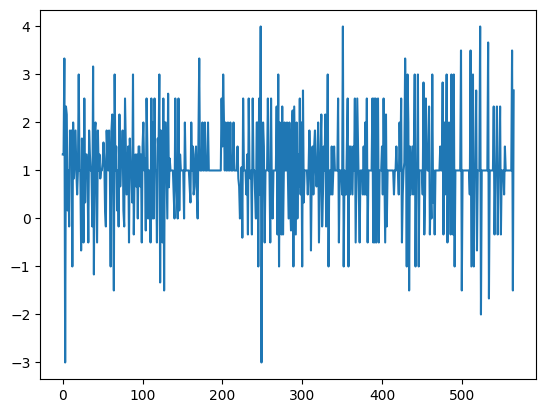

In [234]:
plt.plot(y)

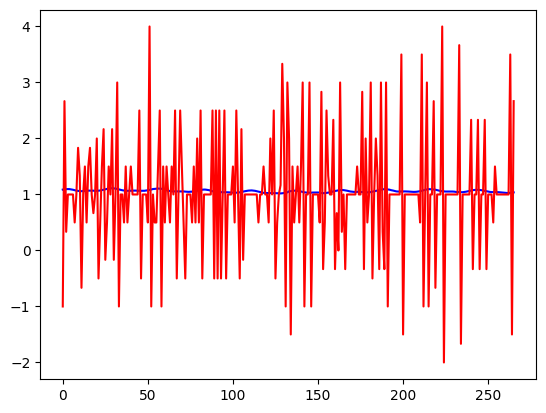

In [235]:
# inverse_y = y_test[0]

plt.plot(y_pred, 'b-', label='Prediction')
plt.plot(y_test, 'r-', label='True')
plt.show()

In [236]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.6966657808699172
MSE: 1.0892882114681974
RMSE: 1.0892882114681974


In [238]:
learning_data.iloc[0, -1]

3262.0

In [242]:
y_pred_dediff = [learning_data.iloc[train_size-1, -1]]

for diff in y_pred:
    
    value = y_pred_dediff[-1] + diff
    y_pred_dediff.append(value)

# plt.plot(learning_data.iloc[:, -1])
learning_data.iloc[train_size:,:].shape, len(y_pred_dediff)

((267, 5), 267)

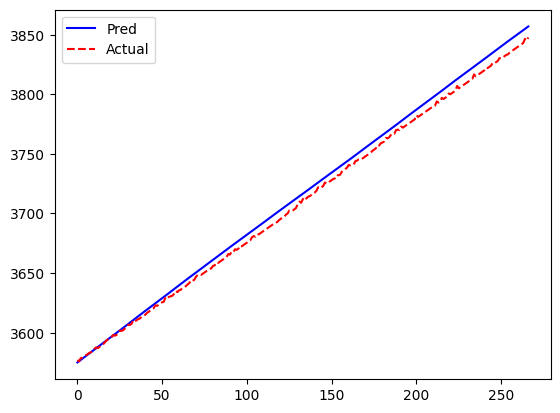

In [249]:
plt.plot(y_pred_dediff, 'b-', label='Pred')

plt.plot(learning_data.iloc[train_size:, -1].values, 'r--', label='Actual')
plt.legend()

plt.show()

# LSTM
[Medium/](https://medium.com/@kareimtarek1972/future-forecasting-of-time-series-using-lstm-a-quick-guide-for-business-leaders-370661c574c9)

In [250]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

ModuleNotFoundError: No module named 'scalecast'

In [161]:
def build_tle_lstm_model(sequence_length, n_features):
    """
    Build LSTM model for TLE element prediction
    """
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(sequence_length, n_features)),
#         Dropout(0.2),
        LSTM(64, return_sequences=True),
#         Dropout(0.2),
        LSTM(32, return_sequences=False),
#         Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')  # Predict all TLE elements
    ])
    
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    
    return model

def create_sequences(data, sequence_length):
    """
    Create sequences for LSTM training
    """

    X, y = [], []
    for i in range(len(data) - sequence_length):
        # Step before
        X.append(data[i:(i + sequence_length)])
        
        # a Step after
        
        y.append(data[i + sequence_length])
    
    return np.array(X), np.array(y)

In [162]:
learning_data[feature_cols]

,First Derivative Mean Motion,Inclination (degrees),Eccentricity,Mean Motion (revolutions per day)
Epoch,,,,
2022-12-31,-7.800000e-07,0.021500,0.000331,1.002717
2023-01-01,-7.666667e-07,0.022433,0.000335,1.002718
2023-01-02,-7.500000e-07,0.023933,0.000340,1.002720
2023-01-03,-7.400000e-07,0.025600,0.000343,1.002721
2023-01-04,-7.400000e-07,0.026800,0.000344,1.002722
...,...,...,...,...
2024-08-02,-9.700000e-07,0.046500,0.000359,1.002715
2024-08-03,-9.700000e-07,0.047250,0.000363,1.002721
2024-08-04,-9.600000e-07,0.047200,0.000365,1.002723


In [163]:
def physics_informed_loss(y_true, y_pred):
    """
    Custom loss function incorporating orbital mechanics constraints
    """
    import tensorflow as tf
    
    # Standard MSE loss
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    
    # Physics constraints (simplified examples)
    # Eccentricity must be between 0 and 1
#     ecc_penalty = tf.reduce_mean(tf.square(tf.clip_by_value(y_pred[:, 3], 0, 1) - y_pred[:, 3]))
    
#     # Mean motion must be positive
#     mm_penalty = tf.reduce_mean(tf.square(tf.nn.relu(-y_pred[:, 6])))
    
#     # Inclination must be between 0 and 180 degrees
#     inc_penalty = tf.reduce_mean(tf.square(tf.clip_by_value(y_pred[:, 1], 0, 180) - y_pred[:, 1]))
    
    # Combined loss
    total_loss = mse_loss #+ 0.1 * (ecc_penalty + mm_penalty + inc_penalty)
    
    return total_loss

In [179]:
y.shape

(565, 4)

In [182]:
# Select the relevant data for the model

feature_cols = ['First Derivative Mean Motion', 'Inclination (degrees)', 'Eccentricity', 'Mean Motion (revolutions per day)']
target_col = 'Revolution Number at Epoch'



In [178]:
y

array([[0.59183673, 0.27447996, 0.59832064, 0.700268  ],
       [0.6122449 , 0.29984779, 0.61745753, 0.72827872],
       [0.6122449 , 0.31811263, 0.62565905, 0.74798997],
       ...,
       [0.16326531, 0.62861492, 0.74809607, 0.78676407],
       [0.2244898 , 0.46423135, 0.771529  , 0.792859  ],
       [0.27891156, 0.02587519, 0.78871314, 0.80833405]])

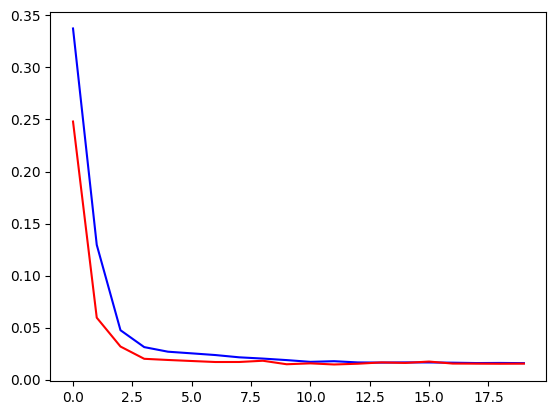

In [169]:
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'], 'r-')

plt.show()

In [170]:
# predict and update by Pred
predictions = []
error = []
current_sequence = X_test[0].copy()
days_ahead= y_test.shape[0]
actual_values = y_test.copy()


for i in range(days_ahead):
    # Predict next step
    print(f'input shape {current_sequence.shape}')
    pred = model.predict(current_sequence.reshape(1, *current_sequence.shape))

    # Apply physics constraints
#     pred = apply_physics_constraints(pred)
    
    print(pred.shape, actual_values[i].shape)
    error.append((pred-actual_values[i])**2)
    predictions.append(pred[0])

    # Update sequence for next prediction
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = pred[0]

# Inverse transform predictions
print(np.array(predictions).shape)
# predictions = scaler.inverse_transform(np.array(predictions))
# predictions.shape

input shape (2, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
(1, 1) ()
input shape (2, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(1, 1) ()
input shape (2, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(1, 1) ()
input shape (2, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(1, 1) ()
input shape (2, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
(1, 1) ()
input shape (2, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(1, 1) ()
input shape (2, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(1, 1) ()
input shape (2, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(1, 1) ()
input shape (2, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
(1, 1) ()
input shape (2, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(1, 1) ()
input shape (2, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(1, 1) ()
input shape (2, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(1, 1) ()
input shape (2, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(1, 1) ()
input shape (2, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
(1, 1) ()
input shape (2, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
(1, 

In [171]:
np.array(predictions).shape, y_test.shape

((113, 1), (113,))

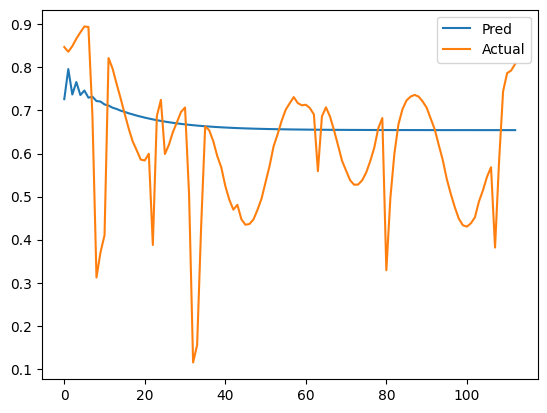

In [174]:
plt.plot(predictions,label='Pred')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()

In [176]:
# inverse transform
inv_y_test = scaler.inverse_transform(y_test)
inv_pred = scaler.inverse_transform(predictions)

inv_y_test.shape, inv_pred.shape

ValueError: Expected 2D array, got 1D array instead:
array=[0.84732428 0.83643123 0.84948561 0.86677617 0.88147316 0.89513271
 0.89400882 0.68678136 0.3120083  0.37062332 0.41030518 0.8218207
 0.79726809 0.76186565 0.72814904 0.69261693 0.65812224 0.62803666
 0.60741765 0.5858909  0.58394571 0.59950722 0.38761131 0.68730008
 0.7246477  0.59885882 0.62051526 0.65021181 0.67303536 0.69650731
 0.70701133 0.50479813 0.11472292 0.15509639 0.4314429  0.66292038
 0.65410219 0.62894441 0.59432005 0.56799516 0.52468229 0.49265151
 0.46969828 0.4808507  0.44726377 0.4345552  0.43637071 0.44700441
 0.46943892 0.49524509 0.53350048 0.57136682 0.61701392 0.64502464
 0.67614766 0.70169448 0.71686695 0.73113167 0.71725599 0.71206882
 0.71336561 0.70571453 0.6909311  0.55904729 0.68626264 0.70735714
 0.68613296 0.65436155 0.61908879 0.58316763 0.56027924 0.53803925
 0.52753523 0.52805395 0.53790957 0.55593499 0.58225988 0.61364226
 0.65877064 0.68250195 0.3288666  0.49667157 0.60015562 0.66771851
 0.70286159 0.72309155 0.7321691  0.73614593 0.73242846 0.72114636
 0.70675197 0.68168064 0.65669577 0.62051526 0.58550186 0.54128123
 0.50639751 0.47540417 0.44881992 0.43351777 0.43027578 0.43792686
 0.45180254 0.48863145 0.51469698 0.54582001 0.56825452 0.38164606
 0.5821302  0.74461831 0.78676407 0.792859   0.80833405].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Baseline moving average

In [51]:
feature_columns = stat_df.columns
print(feature_columns)
window_size = 15  # Differencing features

SMA_features = []
# Create copy of the DataFrame with selected features
SMA_df = TLE_df_time_series.copy()

# Method 1: Using a loop to create moving averages for all features
for col in feature_columns:
    sma_col_name = f'SMA_{col}'
    print('doing:   ', sma_col_name)
    SMA_features.append(sma_col_name)
    SMA_df[sma_col_name] = SMA_df[col].rolling(window=window_size).mean()

Index(['First Derivative Mean Motion', 'Inclination (degrees)', 'Eccentricity',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch'],
      dtype='object')
doing:    SMA_First Derivative Mean Motion
doing:    SMA_Inclination (degrees)
doing:    SMA_Eccentricity
doing:    SMA_Mean Motion (revolutions per day)
doing:    SMA_Revolution Number at Epoch


In [52]:
SMA_df.shape

(1012, 10)

In [53]:
SMA_df

,First Derivative Mean Motion,Inclination (degrees),Eccentricity,Mean Motion (revolutions per day),Revolution Number at Epoch,SMA_First Derivative Mean Motion,SMA_Inclination (degrees),SMA_Eccentricity,SMA_Mean Motion (revolutions per day),SMA_Revolution Number at Epoch
Epoch,,,,,,,,,,
2021-07-16,-8.200000e-07,0.018100,0.000387,1.002708,2727.000000,NaN,NaN,NaN,NaN,NaN
2021-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-04-18,-9.133333e-07,0.036767,0.000301,1.002727,3737.333333,-9.470000e-07,0.045473,0.000264,1.002719,3729.400000
2024-04-19,-8.733333e-07,0.038800,0.000304,1.002727,3738.333333,-9.428889e-07,0.044630,0.000268,1.002720,3730.488889
2024-04-20,-8.366667e-07,0.034967,0.000306,1.002727,3740.666667,-9.353333e-07,0.043344,0.000272,1.002721,3731.666667


In [54]:
SMA_pred = SMA_df[SMA_features].to_numpy()
SMA_pred.shape

(1012, 5)

In [55]:
y_test.shape

NameError: name 'y_test' is not defined

In [56]:
actual_values = TLE_df_time_series[feature_columns].to_numpy()
SMA_error = np.abs(SMA_pred - actual_values)
SMA_error.shape, trans_error[5:,:]

NameError: name 'trans_error' is not defined

In [461]:
# current_sequence.reshape(1, *X_test.shape).shape
error = np.reshape(SMA_error, (SMA_error.shape[0], -1))
error.shape

(4056, 8)

In [462]:
SMA_mae_test = np.mean(error, axis=0)
# SMA_rmse_test = np.sqrt(mse_test)
SMA_mae_test.shape#, SMA_rmse_test.shape

(8,)

In [463]:
# Our model
mae_test

array([0.00305749, 0.00834879, 0.00502242, 0.00416026, 0.0049725 ,
       0.00500093, 0.00430055, 0.00804616])

In [464]:
feature_columns

Index(['First Derivative Mean Motion', 'Inclination (degrees)',
       'Right Ascension of the Ascending Node (degrees)', 'Eccentricity',
       'Argument of Perigee (degrees)', 'Mean Anomaly (degrees)',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch'],
      dtype='object')

In [465]:
SMA_features

['SMA_First Derivative Mean Motion',
 'SMA_Inclination (degrees)',
 'SMA_Right Ascension of the Ascending Node (degrees)',
 'SMA_Eccentricity',
 'SMA_Argument of Perigee (degrees)',
 'SMA_Mean Anomaly (degrees)',
 'SMA_Mean Motion (revolutions per day)',
 'SMA_Revolution Number at Epoch']

In [466]:
X_test.shape

(200, 2, 8)

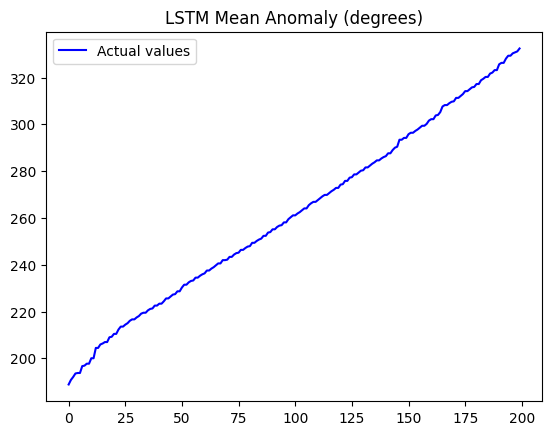

In [471]:
feature_index = 5
plt.title(f'LSTM {feature_columns[feature_index]}')
# plt.plot(X_test[:,feature_index],'r-')
plt.plot(actual_values[:days_ahead,feature_index],'b-',label='Actual values')

# plt.plot(SMA_pred[:,feature_index],'r-',label='Predictions')
plt.legend()
plt.show()

## Differencing features

In [233]:
# Diff df
"""
'First Derivative Mean Motion', 'Inclination (degrees)',
       'Right Ascension of the Ascending Node (degrees)', 'Eccentricity',
       'Argument of Perigee (degrees)', 'Mean Anomaly (degrees)',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch'
"""
# Convert epoch to decimal days since reference
TLE_df_time_series['Epoch'] = TLE_df_time_series['Epoch'].astype(float)

# Sort by Epoch
TLE_df_time_series.sort_values(by='Epoch', ascending=True,inplace=True)

# Calculate differences between consecutive TLEs
TLE_df_time_series['d_firstderiv'] = TLE_df_time_series['First Derivative Mean Motion'].diff()
TLE_df_time_series['d_inclination'] = TLE_df_time_series['Inclination (degrees)'].diff()
TLE_df_time_series['d_raan'] = TLE_df_time_series['Right Ascension of the Ascending Node (degrees)'].diff()
TLE_df_time_series['d_eccentricity'] = TLE_df_time_series['Eccentricity'].diff()
TLE_df_time_series['d_arg_perigee'] = TLE_df_time_series['Argument of Perigee (degrees)'].diff()
TLE_df_time_series['d_mean_anomaly'] = TLE_df_time_series['Mean Anomaly (degrees)'].diff()
TLE_df_time_series['d_mean_motion'] = TLE_df_time_series['Mean Motion (revolutions per day)'].diff()
TLE_df_time_series['d_revs_at_ep'] = TLE_df_time_series['Revolution Number at Epoch'].diff()

# TLE_df_time_series.dropna(inplace=True)#
TLE_df_time_series.head()

,Epoch,First Derivative Mean Motion,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Eccentricity,Argument of Perigee (degrees),Mean Anomaly (degrees),Mean Motion (revolutions per day),Revolution Number at Epoch,d_firstderiv,d_inclination,d_raan,d_eccentricity,d_arg_perigee,d_mean_anomaly,d_mean_motion,d_revs_at_ep
8,21363.981335,0.000005,98.3312,150.6841,0.001435,172.6210,187.5212,14.751619,40376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,21364.388314,0.000005,98.3312,151.1030,0.001438,171.3289,188.8170,14.751625,40382,1.200000e-07,0.0000,0.4189,0.000003,-1.2921,1.2958,0.000006,6.0
9,21364.998784,0.000004,98.3313,151.7314,0.001442,169.3974,190.7540,14.751627,40391,-9.300000e-07,0.0001,0.6284,0.000005,-1.9315,1.9370,0.000002,9.0
6,21365.405763,0.000004,98.3314,152.1503,0.001445,168.1318,192.0233,14.751630,40397,-2.900000e-07,0.0001,0.4189,0.000003,-1.2656,1.2693,0.000003,6.0
0,21365.880572,0.000004,98.3314,152.6391,0.001448,166.6417,193.5177,14.751634,40401,-3.000000e-07,0.0000,0.4888,0.000003,-1.4901,1.4944,0.000004,4.0


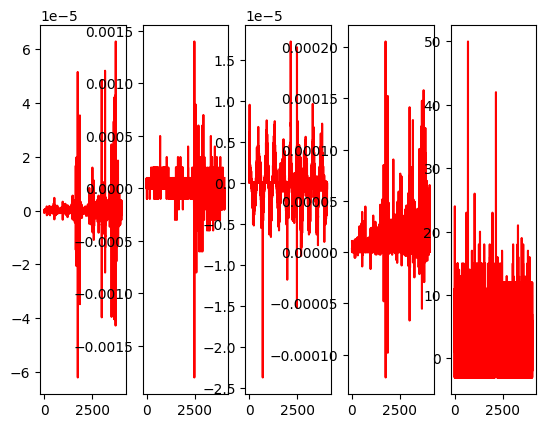

In [234]:
fig, ax = plt.subplots(1,5)
ax[0].plot(TLE_df_time_series['d_firstderiv'],'r')
ax[1].plot(TLE_df_time_series['d_inclination'],'r')
ax[2].plot(TLE_df_time_series['d_eccentricity'],'r')
ax[3].plot(TLE_df_time_series['d_mean_motion'],'r')
ax[4].plot(TLE_df_time_series['d_revs_at_ep'],'r')
plt.show()

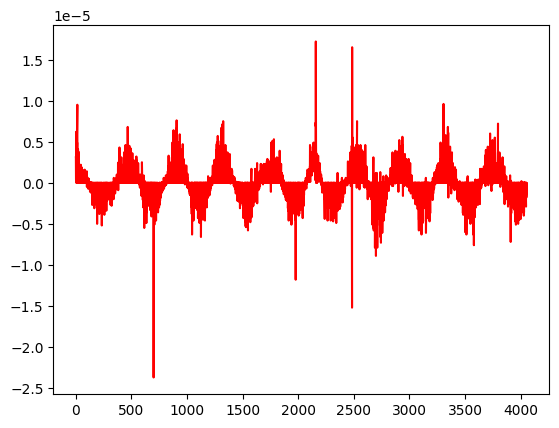

In [235]:
plt.plot(TLE_df_time_series['d_eccentricity'],'r')


In [236]:
TLE_df_time_series

,Epoch,First Derivative Mean Motion,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Eccentricity,Argument of Perigee (degrees),Mean Anomaly (degrees),Mean Motion (revolutions per day),Revolution Number at Epoch,d_firstderiv,d_inclination,d_raan,d_eccentricity,d_arg_perigee,d_mean_anomaly,d_mean_motion,d_revs_at_ep
8,21363.981335,0.000005,98.3312,150.6841,0.001435,172.6210,187.5212,14.751619,40376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,21364.388314,0.000005,98.3312,151.1030,0.001438,171.3289,188.8170,14.751625,40382,1.200000e-07,0.0000,0.4189,2.600000e-06,-1.2921,1.2958,0.000006,6.0
9,21364.998784,0.000004,98.3313,151.7314,0.001442,169.3974,190.7540,14.751627,40391,-9.300000e-07,0.0001,0.6284,4.700000e-06,-1.9315,1.9370,0.000002,9.0
6,21365.405763,0.000004,98.3314,152.1503,0.001445,168.1318,192.0233,14.751630,40397,-2.900000e-07,0.0001,0.4189,2.500000e-06,-1.2656,1.2693,0.000003,6.0
0,21365.880572,0.000004,98.3314,152.6391,0.001448,166.6417,193.5177,14.751634,40401,-3.000000e-07,0.0000,0.4888,3.200000e-06,-1.4901,1.4944,0.000004,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,24365.832441,0.000040,98.3760,208.8184,0.001206,284.6392,75.3480,14.794297,56561,2.310000e-06,-0.0002,0.8458,-1.800000e-06,-2.8117,2.8100,0.000065,12.0
4053,24366.035344,0.000041,98.3760,209.0299,0.001205,283.9724,76.0146,14.794317,56567,1.280000e-06,0.0000,0.2115,-1.500000e-06,-0.6668,0.6666,0.000020,6.0
4055,24366.508782,0.000043,98.3759,209.5233,0.001203,282.3158,77.6705,14.794356,56571,2.150000e-06,-0.0001,0.4934,-1.200000e-06,-1.6566,1.6559,0.000039,4.0
4054,24366.508782,0.000043,98.3759,209.5233,0.001203,282.3158,77.6705,14.794356,56574,0.000000e+00,0.0000,0.0000,0.000000e+00,0.0000,0.0000,0.000000,3.0


((1000, 17), (3057, 17))

In [477]:
def build_tle_lstm_model(sequence_length, n_features):
    """
    Build LSTM model for TLE element prediction
    """
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(sequence_length, n_features)),
#         Dropout(0.2),
        LSTM(64, return_sequences=True),
#         Dropout(0.2),
        LSTM(32, return_sequences=False),
#         Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(n_features, activation='linear')  # Predict all TLE elements
    ])
    
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    
    return model

def create_sequences(data, sequence_length):
    """
    Create sequences for LSTM training
    """

    X, y = [], []
    for i in range(len(data) - sequence_length):
        # Step before
        X.append(data[i:(i + sequence_length)])
        
        # a Step after
        
        y.append(data[i + sequence_length])
    
    return np.array(X), np.array(y)

In [478]:
def physics_informed_loss(y_true, y_pred):
    """
    Custom loss function incorporating orbital mechanics constraints
    """
    import tensorflow as tf
    
    # Standard MSE loss
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    
    # Physics constraints (simplified examples)
    # Eccentricity must be between 0 and 1
    ecc_penalty = tf.reduce_mean(tf.square(tf.clip_by_value(y_pred[:, 3], 0, 1) - y_pred[:, 3]))
    
    # Mean motion must be positive
    mm_penalty = tf.reduce_mean(tf.square(tf.nn.relu(-y_pred[:, 6])))
    
    # Inclination must be between 0 and 180 degrees
    inc_penalty = tf.reduce_mean(tf.square(tf.clip_by_value(y_pred[:, 1], 0, 180) - y_pred[:, 1]))
    
    # Combined loss
    total_loss = mse_loss #+ 0.1 * (ecc_penalty + mm_penalty + inc_penalty)
    
    return total_loss

In [479]:
TLE_df_train.columns

Index(['index', 'Epoch', 'First Derivative Mean Motion',
       'Inclination (degrees)',
       'Right Ascension of the Ascending Node (degrees)', 'Eccentricity',
       'Argument of Perigee (degrees)', 'Mean Anomaly (degrees)',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch',
       'd_firstderiv', 'd_inclination', 'd_raan', 'd_eccentricity',
       'd_arg_perigee', 'd_mean_anomaly', 'd_mean_motion', 'd_revs_at_ep',
       'cirdiff_RA', 'cirdiff_AP', 'cirdiff_MA'],
      dtype='object')

## Handle seasonal features

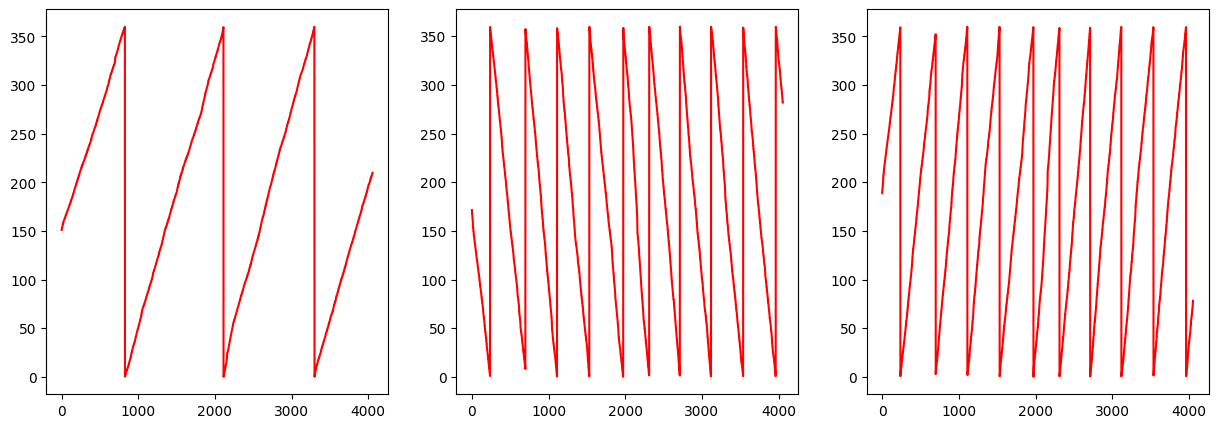

In [480]:

fig, axs = plt.subplots(1,3, figsize=(15,5))

# Seasonality
axs[0].plot(TLE_df_time_series['Right Ascension of the Ascending Node (degrees)'],'r')
axs[1].plot(TLE_df_time_series['Argument of Perigee (degrees)'],'r')
axs[2].plot(TLE_df_time_series['Mean Anomaly (degrees)'],'r')

In [481]:
def circular_difference(angle1, angle2, period=360.0):
    """
    Compute circular difference between two angles
    
    Parameters:
    angle1, angle2: angles in degrees [0, 360]
    period: period of the circular data (default 360 degrees)
    
    Returns:
    difference: shortest angular difference in [-180, 180]
    """
    diff = angle2 - angle1
    
    # Wrap to [-180, 180] range
    diff = ((diff + 180) % period) - 180
    
    return diff


In [482]:
TLE_df_time_series.shape

(4056, 21)

In [483]:
raan_series.iloc[4055]

209.5233

In [484]:
raan_diff = [np.nan]
arg_peri_diff = [np.nan]
mean_anomaly_diff = [np.nan]

raan_series = TLE_df_time_series['Right Ascension of the Ascending Node (degrees)']
arg_peri_series = TLE_df_time_series['Argument of Perigee (degrees)']
mean_anomaly_series = TLE_df_time_series['Mean Anomaly (degrees)']

for i in range(1, TLE_df_time_series.shape[0]):
    
    raan_diff.append(circular_difference(raan_series.iloc[i-1], raan_series.iloc[i]))
    arg_peri_diff.append(circular_difference(arg_peri_series.iloc[i-1], arg_peri_series.iloc[i]))
    mean_anomaly_diff.append(circular_difference(mean_anomaly_series.iloc[i-1], mean_anomaly_series.iloc[i]))
    
    
    
# test_df = TLE_df_time_series.copy()
TLE_df_time_series['cirdiff_RA'] = raan_diff
TLE_df_time_series['cirdiff_AP'] = arg_peri_diff
TLE_df_time_series['cirdiff_MA'] = mean_anomaly_diff
TLE_df_time_series.head()

,index,Epoch,First Derivative Mean Motion,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Eccentricity,Argument of Perigee (degrees),Mean Anomaly (degrees),Mean Motion (revolutions per day),Revolution Number at Epoch,...,d_inclination,d_raan,d_eccentricity,d_arg_perigee,d_mean_anomaly,d_mean_motion,d_revs_at_ep,cirdiff_RA,cirdiff_AP,cirdiff_MA
0,5,21364.388314,0.000005,98.3312,151.1030,0.001438,171.3289,188.8170,14.751625,40382,...,0.0000,0.4189,2.600000e-06,-1.2921,1.2958,5.690000e-06,6.0,NaN,NaN,NaN
1,9,21364.998784,0.000004,98.3313,151.7314,0.001442,169.3974,190.7540,14.751627,40391,...,0.0001,0.6284,4.700000e-06,-1.9315,1.9370,2.240000e-06,9.0,0.6284,-1.9315,1.9370
2,6,21365.405763,0.000004,98.3314,152.1503,0.001445,168.1318,192.0233,14.751630,40397,...,0.0001,0.4189,2.500000e-06,-1.2656,1.2693,2.660000e-06,6.0,0.4189,-1.2656,1.2693
3,0,21365.880572,0.000004,98.3314,152.6391,0.001448,166.6417,193.5177,14.751634,40401,...,0.0000,0.4888,3.200000e-06,-1.4901,1.4944,3.940000e-06,4.0,0.4888,-1.4901,1.4944
4,1,21365.948402,0.000004,98.3314,152.7089,0.001449,166.4349,193.7251,14.751634,40402,...,0.0000,0.0698,4.000000e-07,-0.2068,0.2074,5.000000e-07,1.0,0.0698,-0.2068,0.2074


In [485]:
TLE_df_time_series.dropna(inplace=True)
TLE_df_time_series = TLE_df_time_series.reset_index()
TLE_df_time_series.head()

,level_0,index,Epoch,First Derivative Mean Motion,Inclination (degrees),Right Ascension of the Ascending Node (degrees),Eccentricity,Argument of Perigee (degrees),Mean Anomaly (degrees),Mean Motion (revolutions per day),...,d_inclination,d_raan,d_eccentricity,d_arg_perigee,d_mean_anomaly,d_mean_motion,d_revs_at_ep,cirdiff_RA,cirdiff_AP,cirdiff_MA
0,1,9,21364.998784,0.000004,98.3313,151.7314,0.001442,169.3974,190.7540,14.751627,...,0.0001,0.6284,4.700000e-06,-1.9315,1.9370,2.240000e-06,9.0,0.6284,-1.9315,1.9370
1,2,6,21365.405763,0.000004,98.3314,152.1503,0.001445,168.1318,192.0233,14.751630,...,0.0001,0.4189,2.500000e-06,-1.2656,1.2693,2.660000e-06,6.0,0.4189,-1.2656,1.2693
2,3,0,21365.880572,0.000004,98.3314,152.6391,0.001448,166.6417,193.5177,14.751634,...,0.0000,0.4888,3.200000e-06,-1.4901,1.4944,3.940000e-06,4.0,0.4888,-1.4901,1.4944
3,4,1,21365.948402,0.000004,98.3314,152.7089,0.001449,166.4349,193.7251,14.751634,...,0.0000,0.0698,4.000000e-07,-0.2068,0.2074,5.000000e-07,1.0,0.0698,-0.2068,0.2074
4,5,7,21365.948402,0.000004,98.3314,152.7089,0.001449,166.4349,193.7251,14.751634,...,0.0000,0.0000,0.000000e+00,0.0000,0.0000,0.000000e+00,3.0,0.0000,0.0000,0.0000


In [486]:
# Split train and usage
TLE_df_train = TLE_df_time_series.iloc[:1000].copy()
TLE_df_usage = TLE_df_time_series.iloc[1000:].copy()
TLE_df_train.shape, TLE_df_usage.shape

((1000, 22), (3055, 22))

## Feature selection and model training 

In [487]:
# Prepare features
# feature_columns = [
#      'First Derivative Mean Motion', 'Inclination (degrees)',
#        'Right Ascension of the Ascending Node (degrees)', 'Eccentricity',
#        'Argument of Perigee (degrees)', 'Mean Anomaly (degrees)',
#        'Mean Motion (revolutions per day)', 'Revolution Number at Epoch'
# ]
feature_columns = [
     'd_firstderiv', 'd_inclination', 
       'cirdiff_RA', 'd_eccentricity',
       'cirdiff_AP', 'cirdiff_MA',
       'd_mean_motion', 'd_revs_at_ep'
]

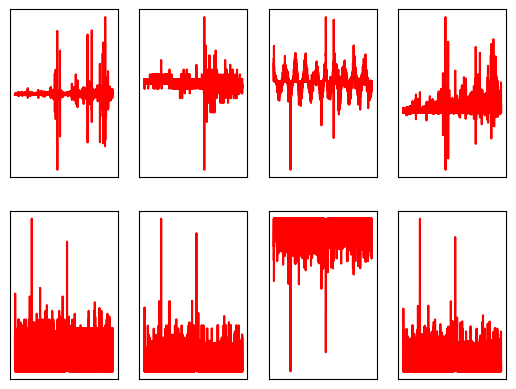

In [488]:
fig, axs = plt.subplots(2,4)
axs[0,0].plot(TLE_df_time_series['d_firstderiv'],'r')
axs[0,1].plot(TLE_df_time_series['d_inclination'],'r')
axs[0,2].plot(TLE_df_time_series['d_eccentricity'],'r')
axs[0,3].plot(TLE_df_time_series['d_mean_motion'],'r')

axs[1,0].plot(TLE_df_time_series['d_revs_at_ep'],'r')

# Seasonality
# axs[1,1].plot(TLE_df_time_series['Right Ascension of the Ascending Node (degrees)'],'r')
# axs[1,2].plot(TLE_df_time_series['Argument of Perigee (degrees)'],'r')
# axs[1,3].plot(TLE_df_time_series['Mean Anomaly (degrees)'],'r')
axs[1,1].plot(TLE_df_time_series['cirdiff_RA'],'r')
axs[1,2].plot(TLE_df_time_series['cirdiff_AP'],'r')
axs[1,3].plot(TLE_df_time_series['cirdiff_MA'],'r')



# Turn off axes for all subplots
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [489]:

sequence_length=2 # Step used for forecasting : 3 features = 2 difference
forecast_horizon=1 # Future forecasting
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(TLE_df_train[feature_columns])

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build and train model
model = build_tle_lstm_model(sequence_length, len(feature_columns))

# Use physics-informed loss
model.compile(
    optimizer='adam',
    loss=physics_informed_loss,
    metrics=['mae','mse']
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

/lustre/GOTOML/noppachanin/conda/envs/mlssa/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.1821 - mae: 0.3228 - mse: 0.1821 - val_loss: 0.0477 - val_mae: 0.1967 - val_mse: 0.0477
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0267 - mae: 0.1358 - mse: 0.0267 - val_loss: 0.0059 - val_mae: 0.0586 - val_mse: 0.0059
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mae: 0.0564 - mse: 0.0060 - val_loss: 0.0055 - val_mae: 0.0552 - val_mse: 0.0055
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mae: 0.0521 - mse: 0.0063 - val_loss: 0.0055 - val_mae: 0.0560 - val_mse: 0.0055
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mae: 0.0523 - mse: 0.0060 - val_loss: 0.0055 - val_mae: 0.0562 - val_mse: 0.0055
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mae: 0.0543 - mse: 0.0064 - val_loss: 0.0054 - val_mae: 0.0553 - val_mse: 0.0054
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mae: 0.0506 - mse: 0.0049 - val_loss: 0.0054

In [490]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

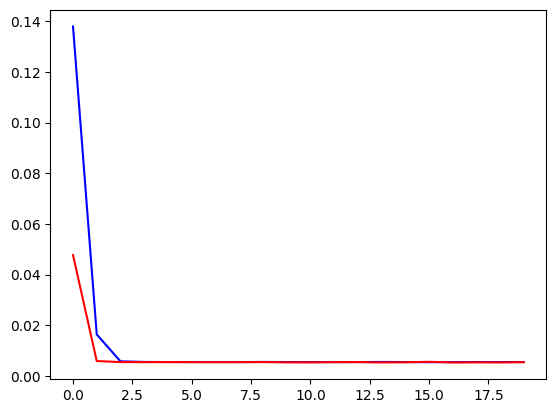

In [491]:
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'], 'r-')

plt.show()

In [492]:
y_test.shape, X_test.shape

((200, 8), (200, 2, 8))

In [493]:
# predict and update by Pred
predictions = []
error = []
current_sequence = X_test[0].copy()
days_ahead=y_test.shape[0]
actual_values = y_test.copy()


for i in range(days_ahead):
    # Predict next step
    print(f'input shape {current_sequence.shape}')
    pred = model.predict(current_sequence.reshape(1, *current_sequence.shape))

    # Apply physics constraints
#     pred = apply_physics_constraints(pred)
    
    print(pred.shape, actual_values[i].shape)
    error.append((pred-actual_values[i])**2)
    predictions.append(pred[0])

    # Update sequence for next prediction
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = pred[0]

# Inverse transform predictions
print(np.array(predictions).shape)
# predictions = scaler.inverse_transform(np.array(predictions))
# predictions.shape

input shape (2, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
(1, 8) (8,)
input shape (2, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
(1, 8) (8,)
input shape (2, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
(1, 8) (8,)
input shape (2, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
(1, 8) (8,)
input shape (2, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
(1, 8) (8,)
input shape (2, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
(1, 8) (8,)
input shape (2, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
(1, 8) (8,)
input shape (2, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
(1, 8) (8,)
input shape (2, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
(1, 8) (8,)
input shape (2, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
(1, 8) (8,)
input shape (2, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
(1, 8) (8,)
input shape (2, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
(1, 8) (8,)
input shape (2, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
(1, 8) (8,)
input shape (2, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
(1, 8) (8,)
input shape (2, 8)
1/1 ━━━━━━━━━━

In [494]:
rmse_test

array([0.05529455, 0.09137171, 0.070869  , 0.06450009, 0.07051592,
       0.07071723, 0.06557859, 0.08970041])

In [495]:
y_train[:5,7], y_test[:5,7]

(array([0.13207547, 0.0754717 , 0.11320755, 0.26415094, 0.13207547]),
 array([0.18867925, 0.05660377, 0.18867925, 0.13207547, 0.        ]))

In [496]:
trans_y_train = scaler.inverse_transform(y_train)
trans_y_train[:5,7]

array([ 4.,  1.,  3., 11.,  4.])

In [497]:
trans_y_test = scaler.inverse_transform(y_test)
trans_y_test[:5,7]

array([ 7.,  0.,  7.,  4., -3.])

In [498]:
trans_predictions = scaler.inverse_transform(np.array(predictions))
trans_predictions[:5,7]

array([3.9362173, 3.9586182, 3.9648137, 3.9658635, 3.9751787],
      dtype=float32)

In [499]:
trans_error = np.abs(trans_predictions - trans_y_test)
trans_error.shape, trans_error

((200, 8),
 array([[1.04420046e-07, 7.02601017e-05, 3.97071644e-02, ...,
         1.69666792e-01, 5.47502481e-07, 3.06378269e+00],
        [2.20378807e-07, 2.97722272e-05, 3.01658165e-02, ...,
         7.65272743e-02, 7.40412853e-07, 3.95861816e+00],
        [3.94239435e-07, 3.00152169e-05, 3.92214742e-02, ...,
         1.50271103e-01, 2.03028638e-06, 3.03518629e+00],
        ...,
        [1.08084142e-08, 3.05039703e-05, 1.79137379e-01, ...,
         4.00610308e-01, 2.50355459e-06, 9.85559225e-01],
        [8.08656531e-10, 3.05039612e-05, 2.41662621e-01, ...,
         7.94189274e-01, 3.93644723e-06, 9.85562325e-01],
        [1.20808414e-07, 1.69496030e-04, 3.89437438e-01, ...,
         9.86110308e-01, 5.91355459e-06, 5.01444149e+00]]))

In [500]:
# current_sequence.reshape(1, *X_test.shape).shape
error = np.reshape(error, (days_ahead, -1))
error.shape

(200, 8)

In [501]:
mae_test = np.mean(error, axis=0)
# rmse_test = np.sqrt(mse_test)
mae_test.shape# rmse_test.shape

(8,)

In [502]:
# Our model
mae_test

array([0.00305144, 0.00881599, 0.00517213, 0.00358137, 0.0056831 ,
       0.00504092, 0.00408964, 0.00798566])

In [503]:
# SMA_df
TLE_df_train.columns

Index(['level_0', 'index', 'Epoch', 'First Derivative Mean Motion',
       'Inclination (degrees)',
       'Right Ascension of the Ascending Node (degrees)', 'Eccentricity',
       'Argument of Perigee (degrees)', 'Mean Anomaly (degrees)',
       'Mean Motion (revolutions per day)', 'Revolution Number at Epoch',
       'd_firstderiv', 'd_inclination', 'd_raan', 'd_eccentricity',
       'd_arg_perigee', 'd_mean_anomaly', 'd_mean_motion', 'd_revs_at_ep',
       'cirdiff_RA', 'cirdiff_AP', 'cirdiff_MA'],
      dtype='object')

## Compare to Moving average's result

In [504]:
# Moving average
# Define feature columns and window size
feature_columns = [
    'd_firstderiv', 'd_inclination', 
    'cirdiff_RA', 'd_eccentricity',
    'cirdiff_AP', 'cirdiff_MA',
    'd_mean_motion', 'd_revs_at_ep'
]
window_size = 2  # Differencing features

SMA_features = []
# Create copy of the DataFrame with selected features
SMA_df = TLE_df_train.copy()

# Method 1: Using a loop to create moving averages for all features
for col in feature_columns:
    sma_col_name = f'SMA_{col}'
    print('doing:   ', sma_col_name)
    SMA_features.append(sma_col_name)
    SMA_df[sma_col_name] = SMA_df[col].rolling(window=window_size).mean()

# Method 2: Using apply with lambda function (more concise)
# Add SMA columns for all features at once
# sma_columns = SMA_df[feature_columns].rolling(window=window_size).mean()
# sma_columns.columns = [f'SMA_{col}' for col in feature_columns]

# sma_columns


# # Combine original and SMA columns
# SMA_df = pd.concat([SMA_df, sma_columns], axis=1)

# # Method 3: Using assign for more functional approach
# SMA_df = SMA_df.assign(**{
#     f'SMA_{col}': SMA_df[col].rolling(window=window_size).mean() 
#     for col in feature_columns
# })

# # Display the results
# print(f"\nDataFrame with {window_size}-period SMA:")
# print(SMA_df.head(10))  # Show first 10 rows including NaN values from rolling

# # Optional: Show only non-NaN values
# print(f"\nDataFrame with {window_size}-period SMA (non-NaN values):")
# print(SMA_df.dropna())

doing:    SMA_d_firstderiv
doing:    SMA_d_inclination
doing:    SMA_cirdiff_RA
doing:    SMA_d_eccentricity
doing:    SMA_cirdiff_AP
doing:    SMA_cirdiff_MA
doing:    SMA_d_mean_motion
doing:    SMA_d_revs_at_ep


In [505]:
SMA_df[SMA_features]

,SMA_d_firstderiv,SMA_d_inclination,SMA_cirdiff_RA,SMA_d_eccentricity,SMA_cirdiff_AP,SMA_cirdiff_MA,SMA_d_mean_motion,SMA_d_revs_at_ep
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-6.100000e-07,0.00010,0.52365,3.600000e-06,-1.59855,1.60315,2.450000e-06,7.5
2,-2.950000e-07,0.00005,0.45385,2.850000e-06,-1.37785,1.38185,3.300000e-06,5.0
3,-1.650000e-07,0.00000,0.27930,1.800000e-06,-0.84845,0.85090,2.220000e-06,2.5
4,-1.500000e-08,0.00000,0.03490,2.000000e-07,-0.10340,0.10370,2.500000e-07,2.0
...,...,...,...,...,...,...,...,...
995,-2.500000e-08,0.00005,0.14025,3.000000e-07,-0.39980,0.40000,1.740000e-06,0.5
996,2.000000e-08,0.00000,0.14025,5.000000e-08,-0.39355,0.39375,2.095000e-06,2.0
997,2.500000e-08,0.00000,0.35065,-1.500000e-07,-0.99075,0.99115,5.315000e-06,5.0
998,5.000000e-09,0.00000,0.21040,-2.000000e-07,-0.59720,0.59740,3.220000e-06,3.0


In [506]:
SMA_pred = SMA_df[SMA_features].to_numpy()[800:]
SMA_pred.shape

(200, 8)

In [507]:
y_test.shape

(200, 8)

In [508]:
trans_error = np.abs(SMA_pred - trans_y_test)
trans_error.shape, trans_error[5:,:]

((200, 8),
 array([[5.0000e-09, 5.0000e-05, 1.4010e-01, ..., 4.6680e-01, 2.1250e-06,
         5.0000e+00],
        [5.0000e-09, 5.0000e-05, 1.4010e-01, ..., 4.6680e-01, 2.1250e-06,
         5.0000e+00],
        [9.5000e-08, 5.0000e-05, 2.4520e-01, ..., 8.2545e-01, 3.9500e-06,
         6.5000e+00],
        ...,
        [1.5000e-08, 0.0000e+00, 7.0150e-02, ..., 2.0365e-01, 1.1250e-06,
         2.0000e+00],
        [5.0000e-09, 0.0000e+00, 2.1040e-01, ..., 5.9740e-01, 3.2200e-06,
         0.0000e+00],
        [6.0000e-08, 1.0000e-04, 3.1555e-01, ..., 8.9015e-01, 4.9250e-06,
         3.0000e+00]]))

In [509]:
# current_sequence.reshape(1, *X_test.shape).shape
error = np.reshape(trans_error, (days_ahead, -1))
error.shape

(200, 8)

In [510]:
SMA_mae_test = np.mean(error, axis=0)
# SMA_rmse_test = np.sqrt(mse_test)
SMA_mae_test.shape#, SMA_rmse_test.shape

(8,)

In [511]:
# Our model
mae_test

array([0.00305144, 0.00881599, 0.00517213, 0.00358137, 0.0056831 ,
       0.00504092, 0.00408964, 0.00798566])

In [512]:
# moving average
SMA_mae_test

array([1.6630000e-07, 3.1500000e-05, 1.7959825e-01, 8.5350000e-07,
       5.5342100e-01, 5.5447275e-01, 2.2242750e-06, 3.4250000e+00])

In [513]:
win_features = mae_test<SMA_mae_test
np.array(feature_columns)[win_features]

array(['cirdiff_RA', 'cirdiff_AP', 'cirdiff_MA', 'd_revs_at_ep'],
      dtype='<U14')

## Visualize results

In [514]:
feature_columns = [
     'd_firstderiv', 'd_inclination', 
       'cirdiff_RA', 'd_eccentricity',
       'cirdiff_AP', 'cirdiff_MA',
       'd_mean_motion', 'd_revs_at_ep'
]

In [515]:
X_test.shape

(200, 2, 8)

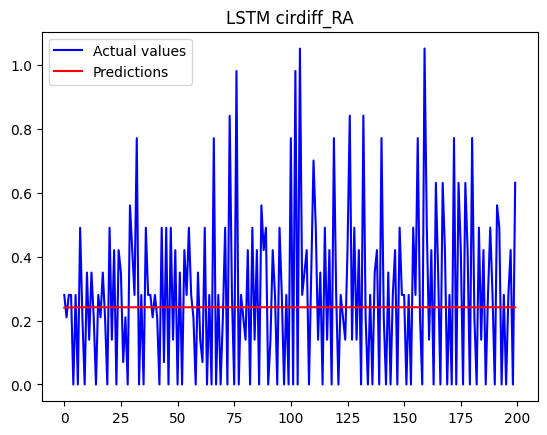

In [518]:
feature_index = 2
plt.title(f'LSTM {feature_columns[feature_index]}')
# plt.plot(X_test[:,feature_index],'r-')
plt.plot(trans_y_test[:days_ahead,feature_index],'b-',label='Actual values')

plt.plot(trans_predictions[:,feature_index],'r-',label='Predictions')
plt.legend()
plt.show()

In [522]:
# TLE_df_time_series.columns
TLE_df_time_series['Right Ascension of the Ascending Node (degrees)'][0]

151.7314

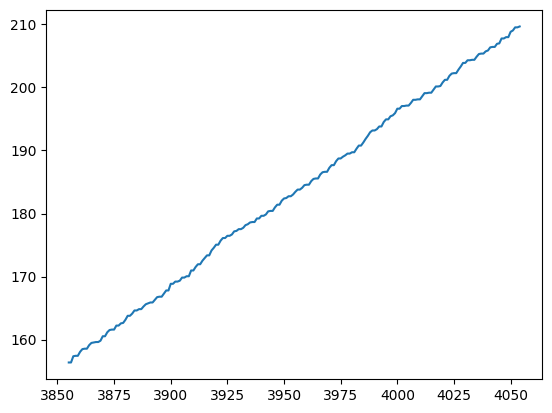

In [525]:
plt.plot(TLE_df_time_series['Right Ascension of the Ascending Node (degrees)'][-200:])

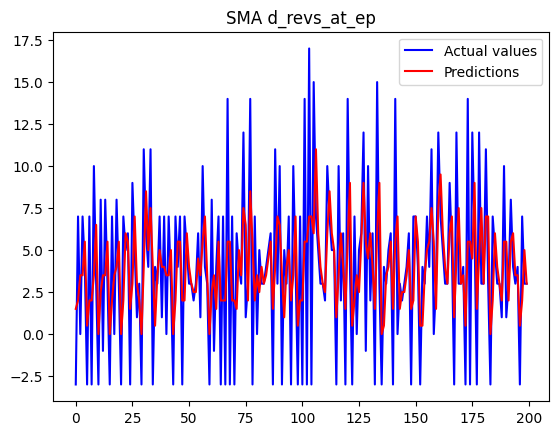

In [425]:
feature_index = 7
plt.title(f'SMA {feature_columns[feature_index]}')
# plt.plot(X_test[:,feature_index],'r-')
plt.plot(trans_y_test[:days_ahead,feature_index],'b-',label='Actual values')

plt.plot(SMA_pred[:,feature_index],'r-',label='Predictions')
plt.legend()
plt.show()

In [276]:
model.predict(X_test[0].reshape(1, *current_sequence.shape))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.41891715, 0.22653037, 0.07867756, 0.69926673, 0.909869  ,
        0.07096566, 0.3338924 , 0.12754487]], dtype=float32)

In [278]:
X_test[0]

array([[0.41205412, 0.33333333, 0.08002513, 0.70180723, 0.91109089,
        0.08914985, 0.33032787, 0.13207547],
       [0.42681427, 0.33333333, 0.1000457 , 0.72891566, 0.88929543,
        0.11101592, 0.36459016, 0.1509434 ],
       [0.44280443, 0.16666667, 0.1200377 , 0.72289157, 0.86852149,
        0.13184828, 0.38639344, 0.16981132]])

In [279]:
np.roll(X_test[0], -1, axis=0)

array([[0.42681427, 0.33333333, 0.1000457 , 0.72891566, 0.88929543,
        0.11101592, 0.36459016, 0.1509434 ],
       [0.44280443, 0.16666667, 0.1200377 , 0.72289157, 0.86852149,
        0.13184828, 0.38639344, 0.16981132],
       [0.41205412, 0.33333333, 0.08002513, 0.70180723, 0.91109089,
        0.08914985, 0.33032787, 0.13207547]])

In [280]:
# predict and update by True
predictions = []
current_sequence = y_test[:7].copy()
days_ahead=7

for _ in range(days_ahead):
    # Predict next step
    print(f'input shape {current_sequence.shape}')
    pred = model.predict(current_sequence.reshape(1, *current_sequence.shape))

    # Apply physics constraints
#     pred = apply_physics_constraints(pred)

    predictions.append(pred[0])

    # Update sequence for next prediction
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = pred[0]

# Inverse transform predictions
print(np.array(predictions).shape)
predictions = scaler.inverse_transform(np.array(predictions))
predictions.shape

input shape (7, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
input shape (7, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
input shape (7, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
input shape (7, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
input shape (7, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
input shape (7, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
input shape (7, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(7, 8)


(7, 8)

# Model Usage

In [ ]:
feature_columns = [
     'd_firstderiv', 'd_inclination', 
       'cirdiff_RA', 'd_eccentricity',
       'cirdiff_AP', 'cirdiff_MA',
       'd_mean_motion', 'd_revs_at_ep'
]

In [527]:
trans_predictions.shape

(200, 8)

# MISC

In [199]:
# Predict and update by true values
predictions = []
current_sequence = X_test[0].copy()
days_ahead=100
true_updates = y_test.copy()
for day_index in range(days_ahead):
    # Predict next step
    print(f'input shape {current_sequence.shape}')
    pred = model.predict(current_sequence.reshape(1, *current_sequence.shape))

    # Apply physics constraints
#     pred = apply_physics_constraints(pred)

    predictions.append(pred[0])

    # Update sequence for next prediction
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = true_updates[day_index]

# Inverse transform predictions
print(np.array(predictions).shape)
# predictions = scaler.inverse_transform(np.array(pred

input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
input shape (3, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
input shape (3, 8)
1/1 ━━━━━━━━

In [200]:
trans_actual_values = scaler.inverse_transform(true_updates)
trans_actual_values[:5,7]

array([-3.,  7.,  0.,  7.,  4.])

In [201]:
trans_predictions = scaler.inverse_transform(np.array(predictions))
trans_predictions[:5,7]

array([3.1379642, 3.1470504, 3.1398458, 3.1406894, 3.1326811],
      dtype=float32)

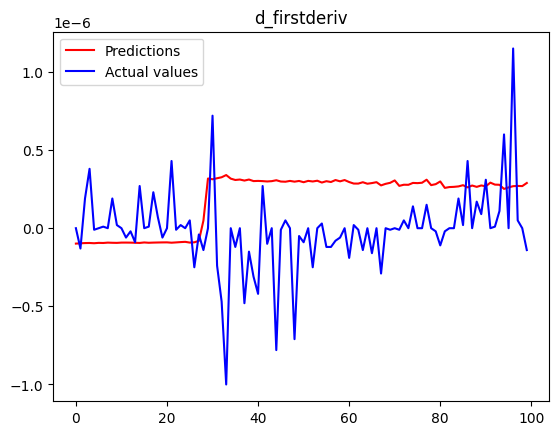

In [202]:
feature_index = 0
plt.title(feature_columns[feature_index])
# plt.plot(X_test[:,feature_index],'r-')
plt.plot(trans_predictions[:,feature_index],'r-',label='Predictions')
plt.plot(trans_y_test[:days_ahead,feature_index],'b-',label='Actual values')
plt.legend()
plt.show()

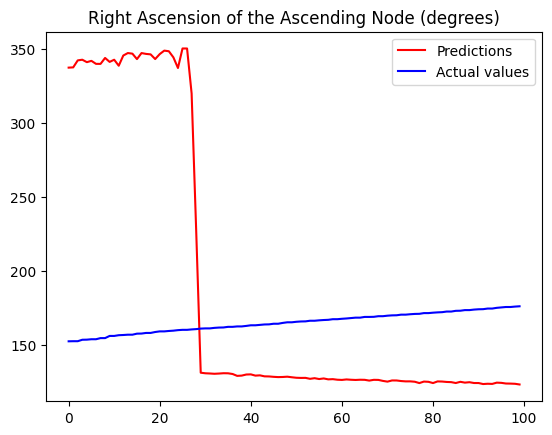

In [203]:
feature_index = 2
plt.title(feature_columns[feature_index])
# plt.plot(X_test[:,feature_index],'r-')
plt.plot(trans_predictions[:,feature_index],'r-',label='Predictions')
plt.plot(trans_y_train[:days_ahead,feature_index],'b-',label='Actual values')
plt.legend()

plt.show()

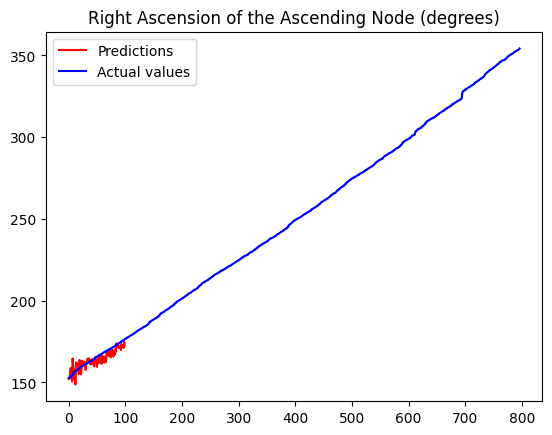

In [198]:
feature_index = 2
plt.title(feature_columns[feature_index])
# plt.plot(X_test[:,feature_index],'r-')
plt.plot(trans_predictions[:,feature_index],'r-',label='Predictions')
plt.plot(trans_y_train[:,feature_index],'b-',label='Actual values')
plt.legend()

plt.show()

# Daily resampling

# Miscellaneous

In [ ]:
 # Calculate position errors
position_errors = []
# true_future_tles = y_test[7:7+days_ahead].copy()
true_future_tles = scaler.inverse_transform(y_test[7:7+days_ahead].copy())

# for pred, true in zip(predictions, true_future_tles):
# #     pred_pos = elements_to_position(pred)

#     error = np.subtract(pred, true)
#     position_errors.append(error)
# position_errors
error = np.abs(np.subtract(predictions, true_future_tles))
error

In [ ]:
error

In [ ]:
def predict_future_tle(model, scaler, last_sequence, days_ahead=7):
    """
    Predict TLE elements for future dates
    """
    predictions = []
    current_sequence = last_sequence.copy()
    
    for _ in range(days_ahead):
        # Predict next step
        pred = model.predict(current_sequence.reshape(1, *current_sequence.shape))
        
        # Apply physics constraints
        pred = apply_physics_constraints(pred)
        
        predictions.append(pred[0])
        
        # Update sequence for next prediction
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = pred[0]
    
    # Inverse transform predictions
    predictions = scaler.inverse_transform(np.array(predictions))
    
    return predictions

def validate_tle_predictions(model, test_data, true_future_tles):
    """
    Validate TLE predictions against actual future observations
    """
    # Predict using model
    predictions = predict_future_tle(model, scaler, test_data)
    
    # Calculate position errors
    position_errors = []
    for pred, true in zip(predictions, true_future_tles):
        pred_pos = elements_to_position(pred)
        true_pos = elements_to_position(true)
        error = np.linalg.norm(pred_pos - true_pos)
        position_errors.append(error)

In [ ]:
def validate_tle_predictions(model, test_data, true_future_tles):
    """
    Validate TLE predictions against actual future observations
    """
    # Predict using model
    predictions = predict_future_tle(model, scaler, test_data)
    
    # Calculate position errors
    position_errors = []
    for pred, true in zip(predictions, true_future_tles):
        pred_pos = elements_to_position(pred)
        true_pos = elements_to_position(true)
        error = np.linalg.norm(pred_pos - true_pos)
        position_errors.append(error)
    
    return np.array(position_errors)